<a href="https://colab.research.google.com/github/FoodSimon/DeepSpectrum/blob/master/Masterproef_final_Simon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREPROCESSING

In [19]:
import numpy
import scipy
import sklearn
import warnings
import pandas
from imblearn.over_sampling import SMOTE
from pandas import ExcelWriter
warnings.simplefilter('ignore')
df = pandas.read_excel("database apneu.xlsx")
df2 = df.assign(Apneu= numpy.where(df['Apneu index']>=5, '1', '0'))

dfApneu = df2.replace([-1], numpy.NaN)

# missing values veranderen door mediaan
dfApneu.fillna(dfApneu.median(), inplace=True)


X= dfApneu.drop(['Apneu index', 'Apneu','Lijst'], axis=1)
Y=  dfApneu.loc[:,"Apneu"]
dfApneu


Lijst  M=0/V=1  ... Apneu index Apneu
0        3        0  ...         9.4     1
1        4        0  ...        51.0     1
2        5        0  ...        21.9     1
3        6        0  ...         3.8     0
4        8        1  ...        10.5     1
..     ...      ...  ...         ...   ...
126    139        0  ...        64.8     1
127    140        1  ...        16.4     1
128    141        1  ...         4.2     0
129    142        0  ...        38.0     1
130    143        1  ...         4.4     0

[131 rows x 25 columns]

In [0]:
# one hot encoding 
from sklearn.preprocessing import OneHotEncoder
One_hot = OneHotEncoder()
dfApneu_oneH = dfApneu

for s in ["Luidheid snurken","Kans slaperig zittend langer dan 1 uur als passagier ","Kans slaperig tijdens zitten en lezen ","Hoe vaak snurken","Kans slaperig in de auto in een file","Aantal keer stoppen ademen","Aantal keer opstaan vermoeid","Aantal dagen vermoeid","Inslapen tijdens besturen auto","Hoge bloeddruk","Kans slaperig tijdens televisie kijken","Kans slaperig zitten openbare instelling","Kans slaperig tijdens rust namiddag","Kans slaperig zitten en praten","Kans slaperig na de lunch"]:
    X = One_hot.fit_transform(dfApneu_oneH[s].values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(X, columns = [s+"_"+str(int(i)) for i in range(X.shape[1])])
    dfApneu_oneH = pd.concat([dfApneu_oneH, dfOneHot], axis=1)
    dfApneu_oneH=dfApneu_oneH.drop([s], axis=1)
    



In [0]:
pandas.set_option('display.max_rows', 1000)
pandas.set_option('display.max_columns', 1000)
dfApneu_oneH

Lijst  M=0-V=1  Leeftijd  Lengte  Gewicht  BMI  Snurk Jij?  \
0        3        0        57     185       75   21           1   
1        4        0        53     163       89   33           1   
2        5        0        56     185       96   28           1   
3        6        0        32     179      105   32           1   
4        8        1        49     174       92   30           1   
5        9        1        38     151       90   39           1   
6       10        1        49     175       63   20           1   
7       12        0        56     186       68   19           1   
8       13        0        47     180       84   25           1   
9       14        1        45     170       80   27           1   
10      15        1        38     170       90   31           1   
11      16        0        48     180       80   24           1   
12      17        1        46     156       73   30           1   
13      18        0        63     168       75   26           1   
14      19        1        39     162       83   31           1   
15      20        1        75     150       76   33           1   
16      21        1        55     161       85   32           1   
17      22        0        45     153       65   27           0   
18      23        0        61     180       73   22           1   
19      25        0        41     179       77   24           1   
20      26        0        75     167       80   28           1   
21      27        1        72     167       70   28           0   
22      28        0        52     162       77   29           1   
23      29        0        34     167       85   27           1   
24      30        1        53     169       96   33           1   
25      31        0        60     183       97   29           1   
26      32        0        55     187       95   27           1   
27      33        0        24     187      100   28           1   
28      36        0        67     175       76   24           1   
29      37        0        41     170       60   20           1   
30      38        1        55     163       65   24           1   
31      39        0        50     188      108   30           1   
32      40        1        59     172       97   32           0   
33      41        0        39     192      102   27           1   
34      42        1        30     174       88   29           0   
35      43        0        42     176       90   29           1   
36      44        0        50     180       76   23           1   
37      45        0        72     167       74   26           1   
38      46        1        59     173       81   27           1   
39      47        0        57     172       81   27           1   
40      48        0        53     175      100   32           1   
41      50        0        78     167      101   36           1   
42      51        0        42     198       96   24           1   
43      52        0        48     182      105   31           1   
44      53        0        38     183       79   23           0   
45      54        0        55     179       96   30           1   
46      55        0        40     178      104   32           1   
47      56        0        41     189       94   26           1   
48      57        0        51     173       85   28           1   
49      59        0        42     180      103   31           1   
50      60        0        45     176       85   27           1   
51      61        0        50     172       84   28           1   
52      62        0        48     170       85   29           1   
53      63        1        34     165       73   26           0   
54      64        0        38     182       87   26           1   
55      65        1        55     180       88   27           1   
56      66        1        76     159       80   31           0   
57      67        1        58     167       62   22           0   
58      68        0        70     170      115   39 

In [0]:
dfApneu_oneH.dtypes

Lijst                                                        int64
M=0-V=1                                                      int64
Leeftijd                                                     int64
Lengte                                                       int64
Gewicht                                                      int64
BMI                                                          int64
Snurk Jij?                                                   int64
Snurken andere mensen storen                                 int64
Apneu index                                                  int64
Apneu                                                        int64
Luidheid snurken_0                                         float64
Luidheid snurken_1                                         float64
Luidheid snurken_2                                         float64
Luidheid snurken_3                                         float64
Luidheid snurken_4                                         flo

In [0]:
X= dfApneu.drop(['Apneu index', 'Apneu','Lijst'], axis=1)
Y=  dfApneu.loc[:,"Apneu"]

# Exploratie

Text(0,0.5,'Count')

<Figure size 2160x2160 with 0 Axes>

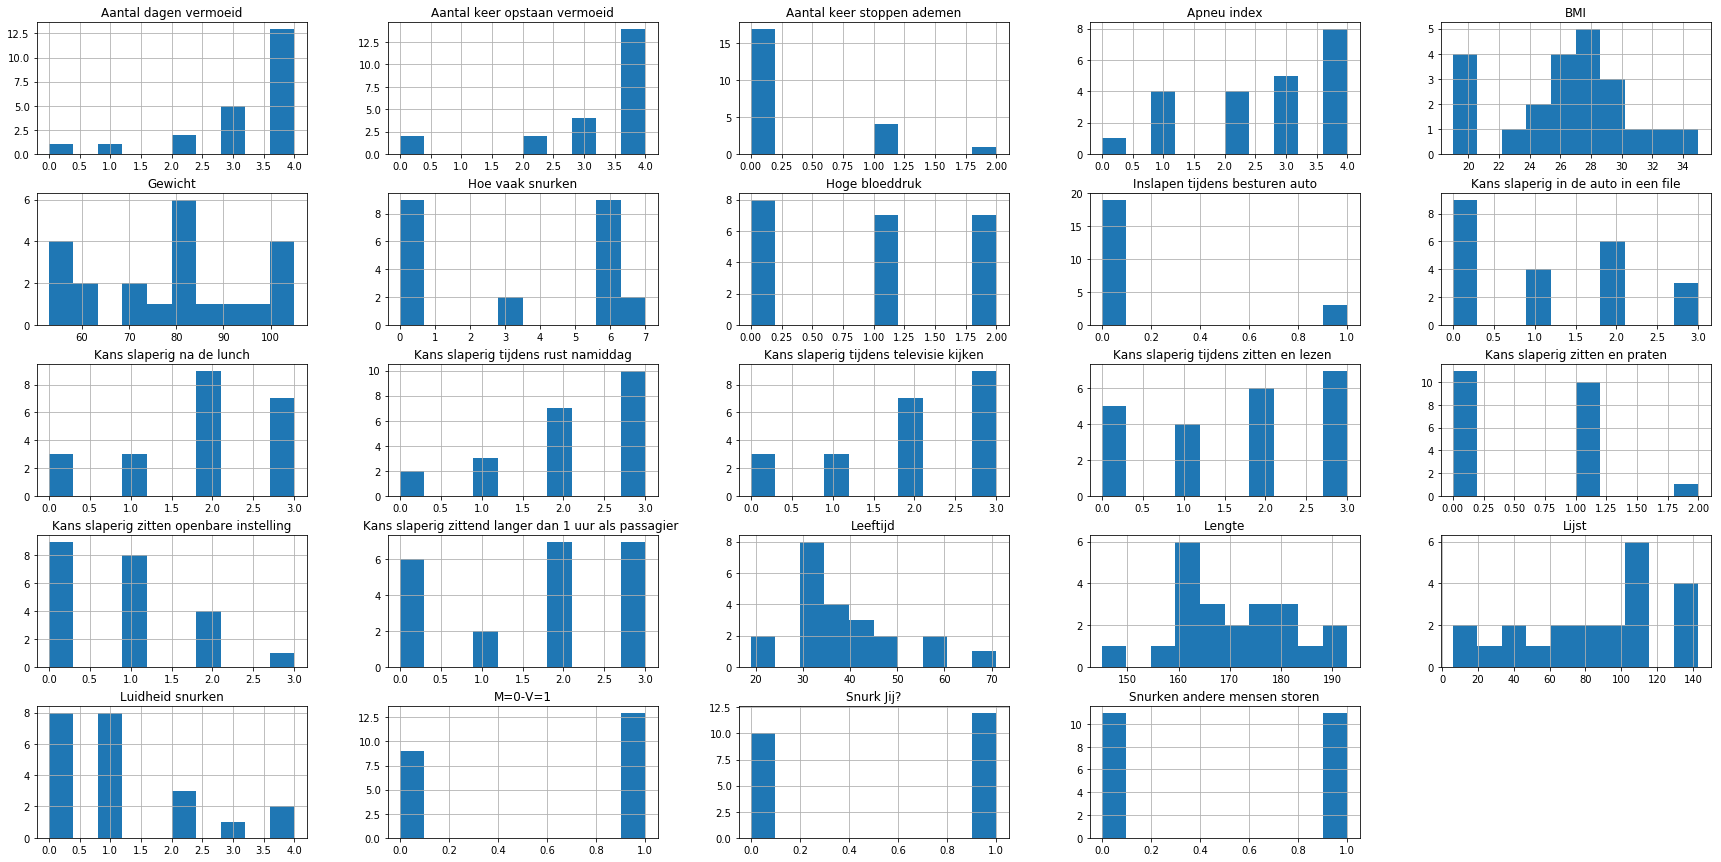

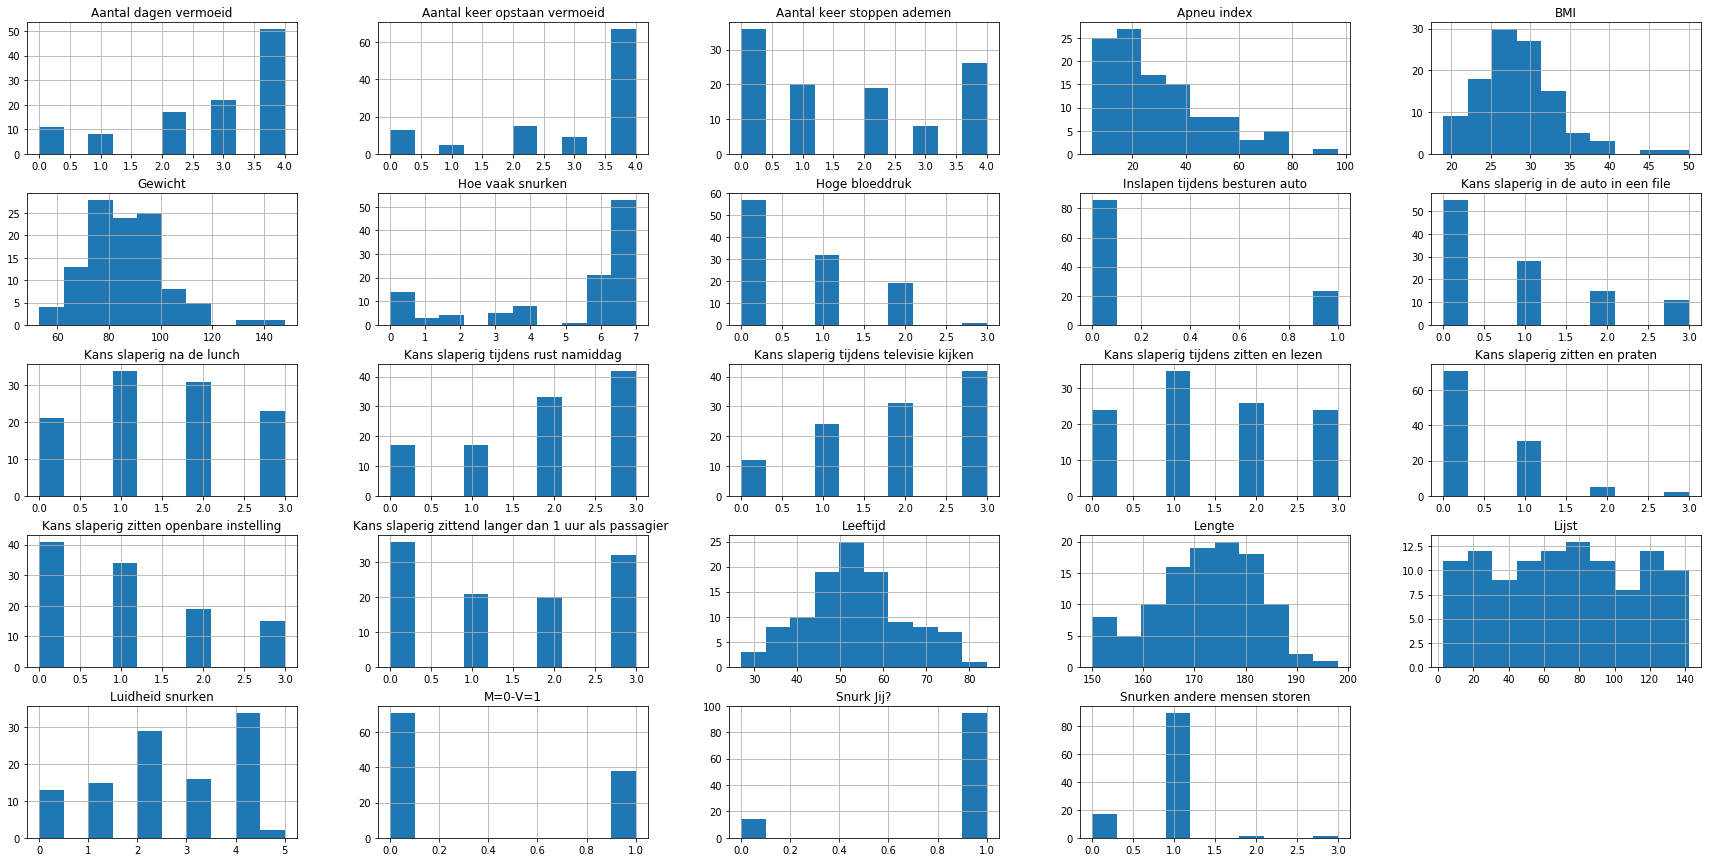

In [0]:
dfApneu.groupby("Apneu").hist(figsize=(30, 15) )

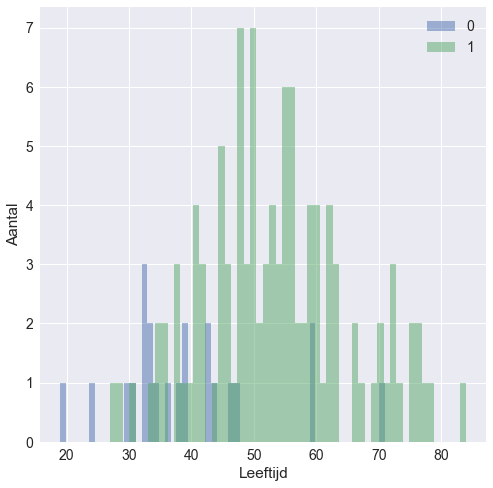

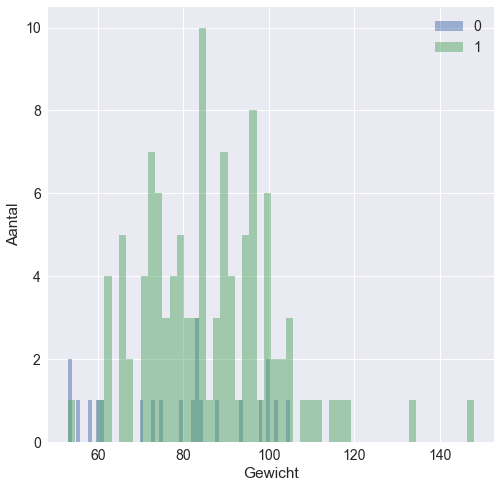

In [0]:
p.figure(figsize=(8,8))
dfApneu.groupby("Apneu").Leeftijd.hist(bins=70-14, alpha = 0.5)
p.xlabel("Leeftijd")
p.ylabel("Aantal")
legend([0, 1])

p.figure(figsize=(8,8))
dfApneu.groupby("Apneu").Gewicht.hist(bins=70-14, alpha = 0.5)
p.xlabel("Gewicht")
p.ylabel("Aantal")
legend([0, 1])

In [0]:
#sns.set(font_scale=3)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,10), dpi = 160)
sns.heatmap(dfApneu.corr(), cmap="RdBu_r", annot=True, fmt=".2f")


NameError: ignored

<Figure size 1600x1600 with 0 Axes>

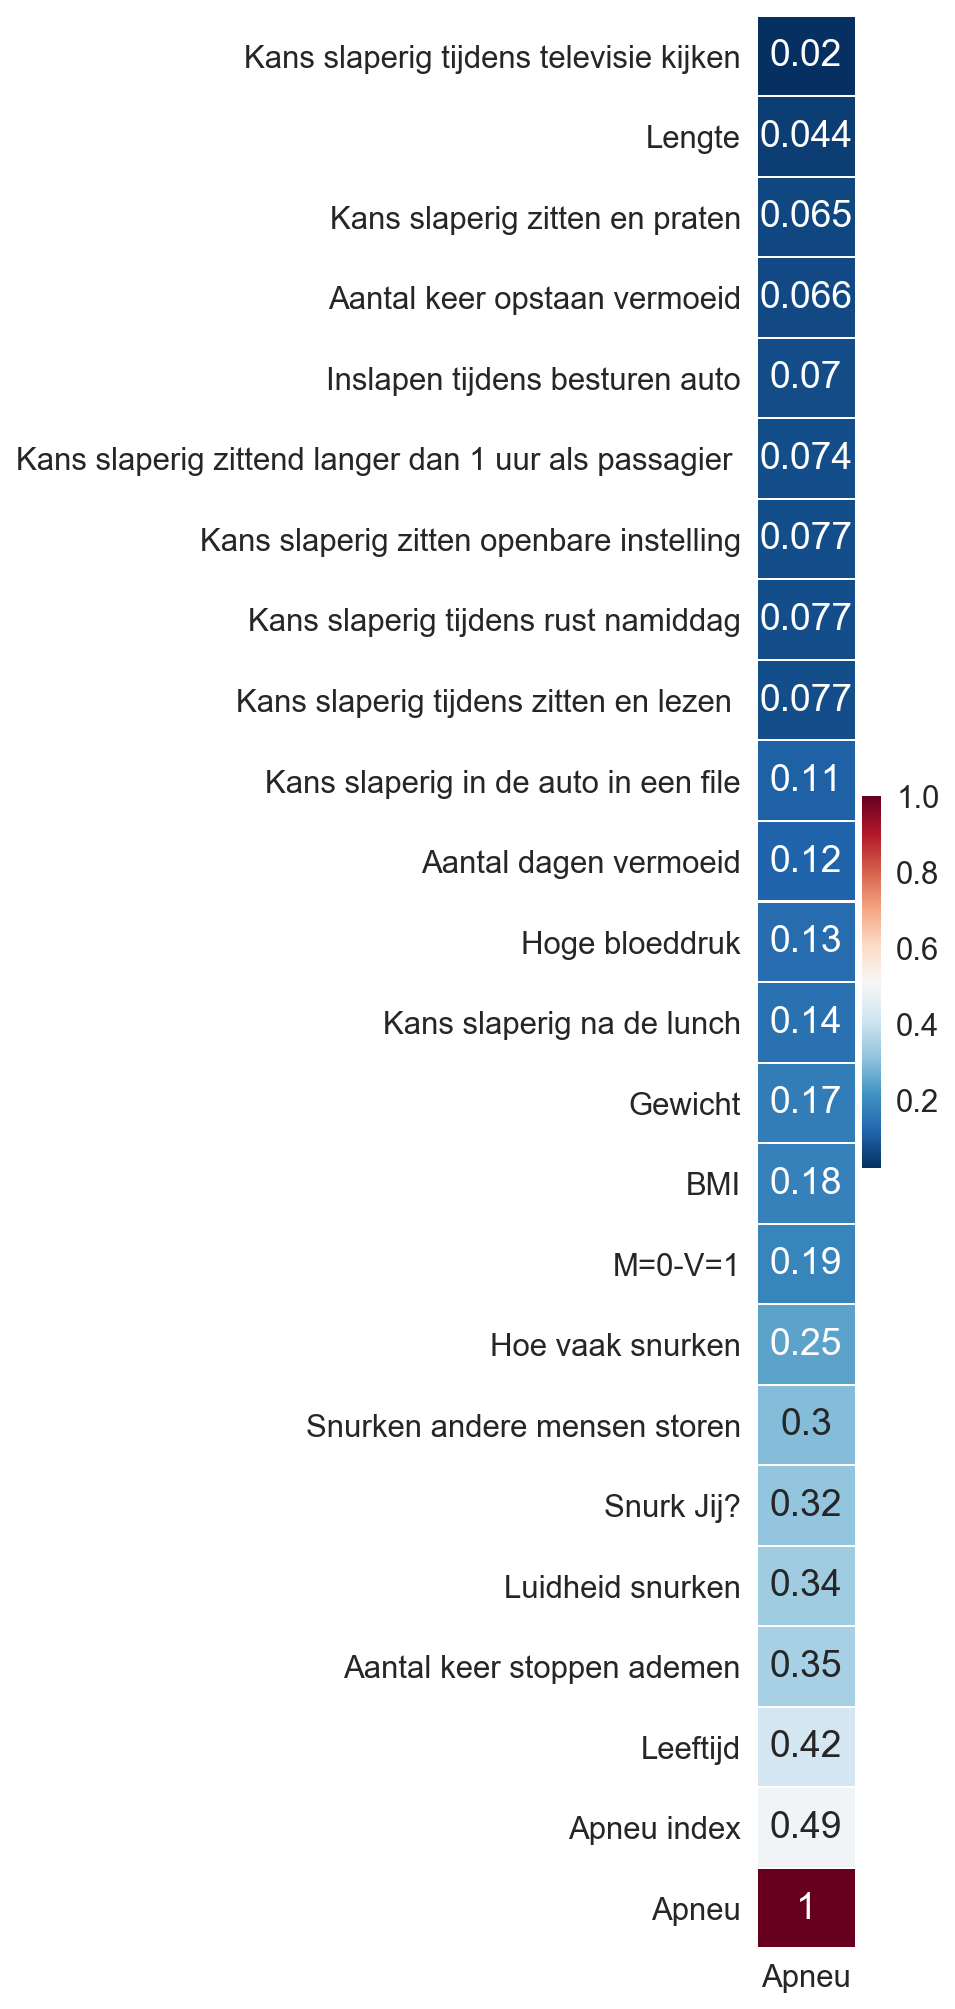

In [0]:
plt.figure(figsize=(1,16), dpi = 160)
sns.set(font_scale=1.4)
corr_with_apneu = dfApneu.corr().applymap(abs).loc["Apneu"].iloc[1:].to_frame()xfi
corr_non_abs = dfApneu.corr().loc["Apneu"].filter(list(corr_with_apneu.index.values)).to_frame()
sns.heatmap(corr_with_apneu, cmap="RdBu_r", annot=True, linewidths=.5)

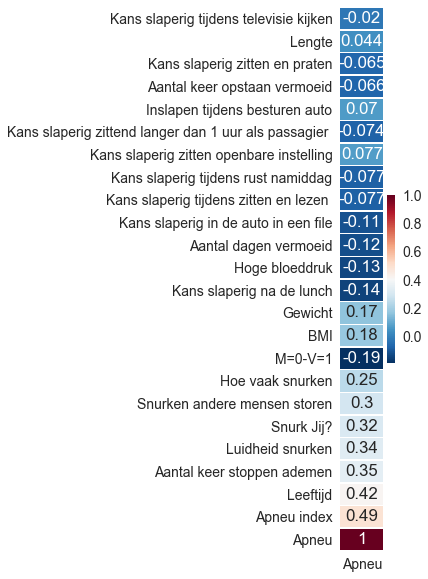

In [0]:
p.figure(figsize=(1,10), facecolor="w")
corr_non_abs = dfApneu.corr().loc["Apneu"].filter(list(corr_with_apneu.index.values)).to_frame()
sns.heatmap(corr_non_abs, cmap="RdBu_r", annot=True, linewidths=.5)

Inslapen tijdens besturen auto
Kans slaperig zittend langer dan 1 uur als passagier 
Lengte
Kans slaperig zitten en praten
Kans slaperig in de auto in een file
Kans slaperig zitten openbare instelling
Hoge bloeddruk
Kans slaperig tijdens rust namiddag
Kans slaperig tijdens televisie kijken
Kans slaperig tijdens zitten en lezen 
Kans slaperig na de lunch
Gewicht
M=0-V=1
BMI
Aantal keer opstaan vermoeid
Hoe vaak snurken
Snurk Jij?
Luidheid snurken
Leeftijd
Aantal dagen vermoeid
Snurken andere mensen storen


/Users/simon/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/simon/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


Aantal keer stoppen ademen
Apneu
Apneu index


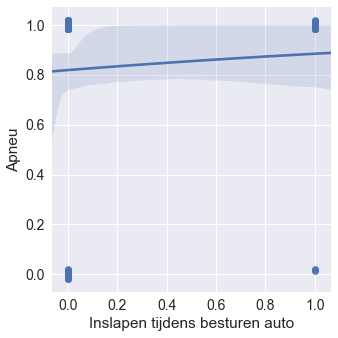

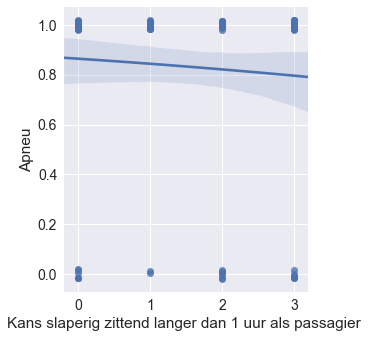

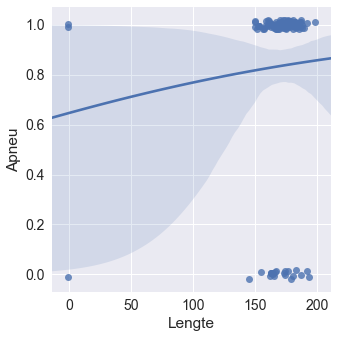

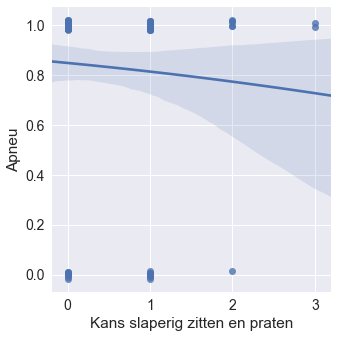

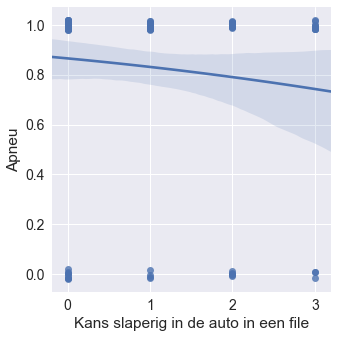

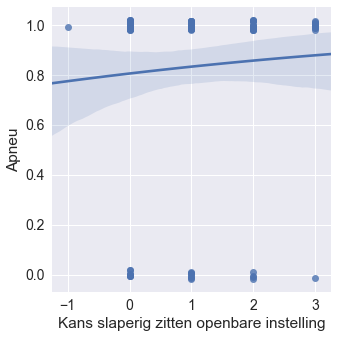

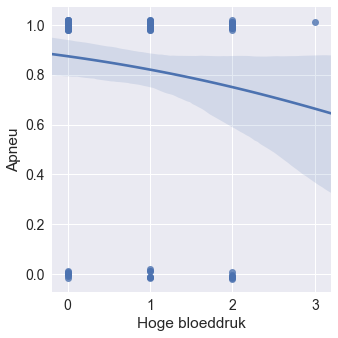

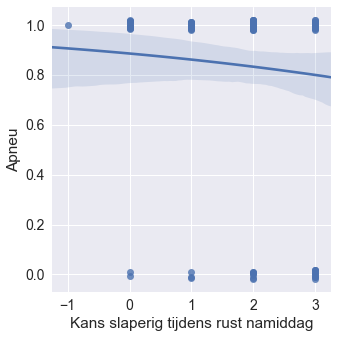

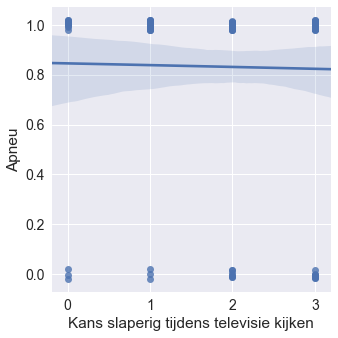

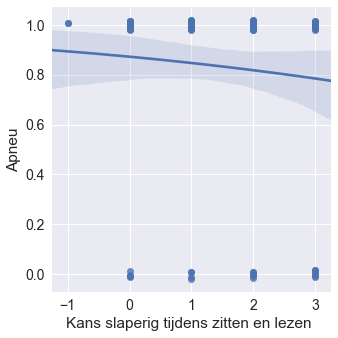

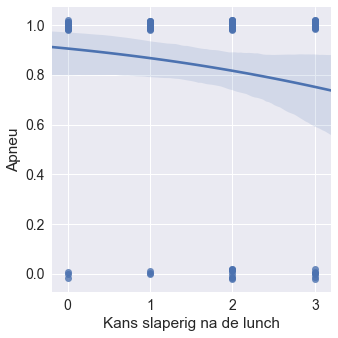

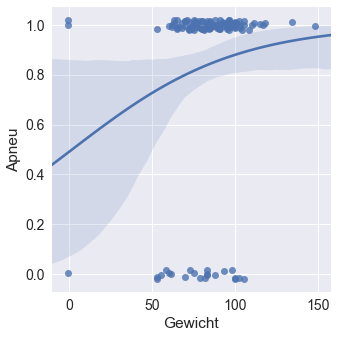

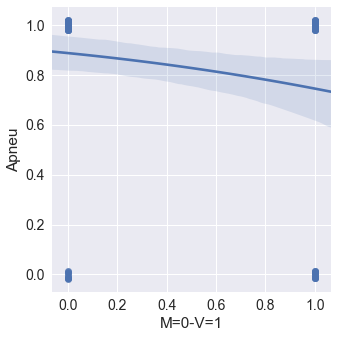

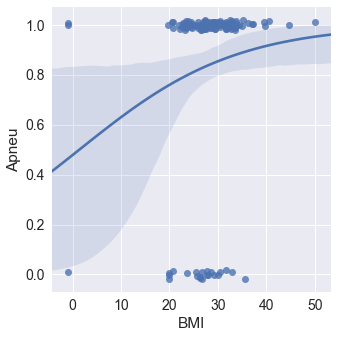

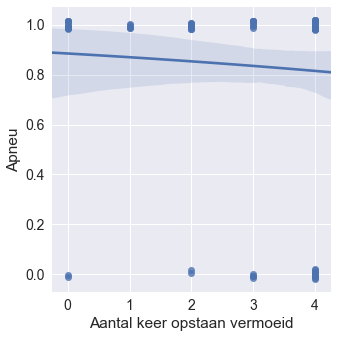

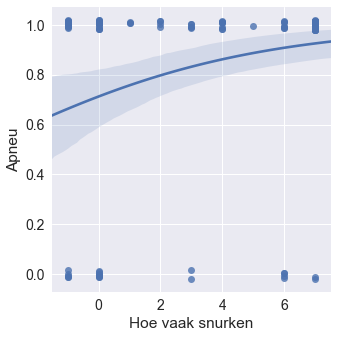

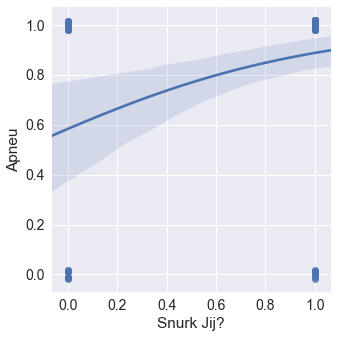

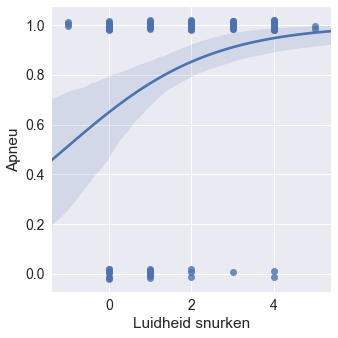

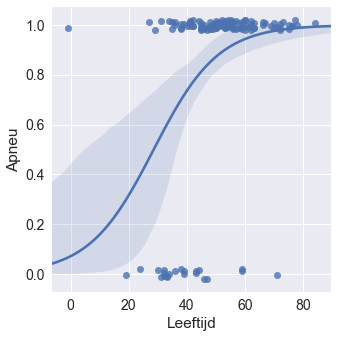

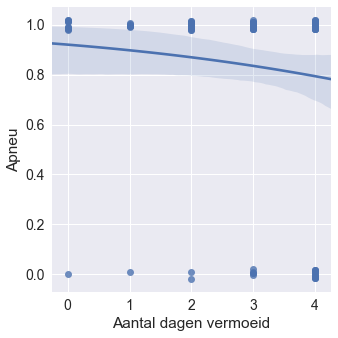

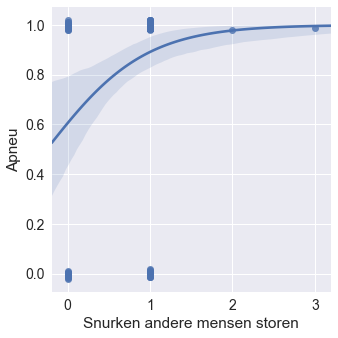

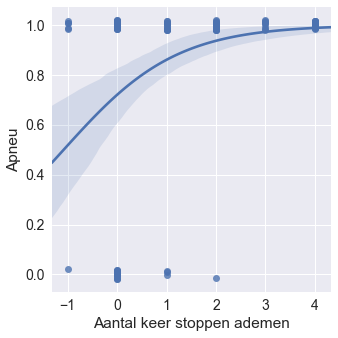

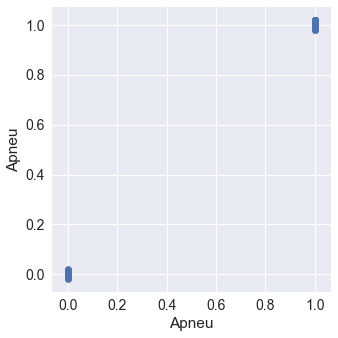

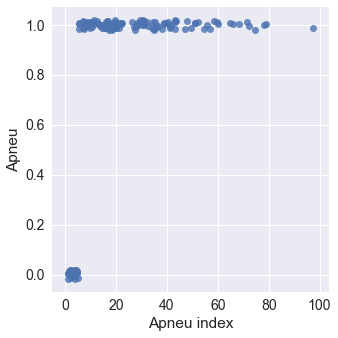

In [0]:
#logistische regressie 
for r in list(corr_with_apneu.index.values):
    print (r)
    g = sns.lmplot(x=r, y="Apneu", data=dfApneu,
       y_jitter=.02, logistic=True)

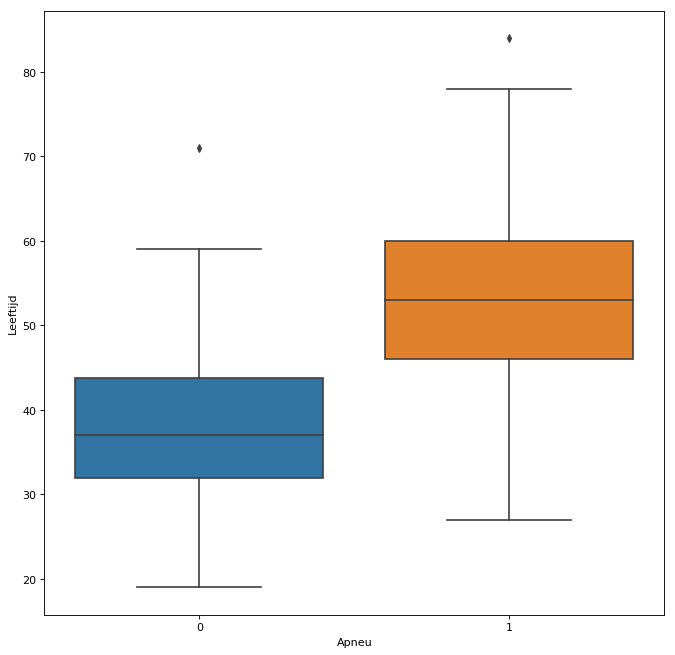

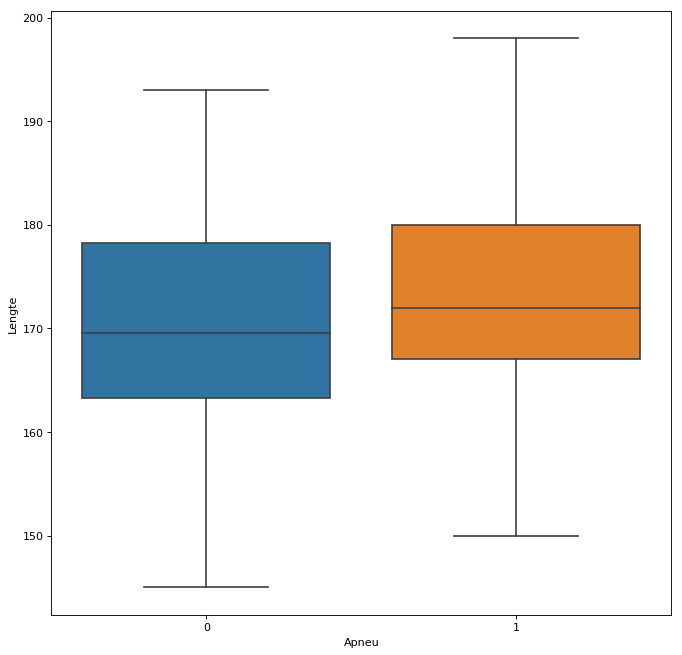

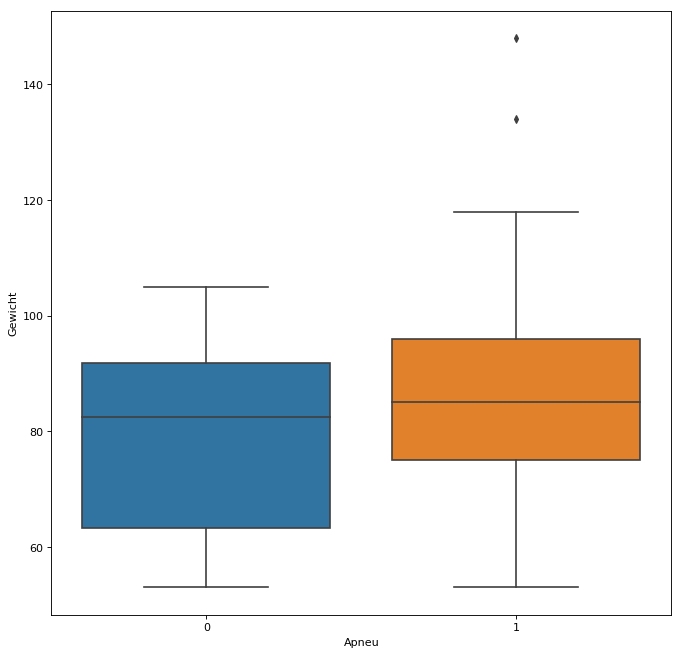

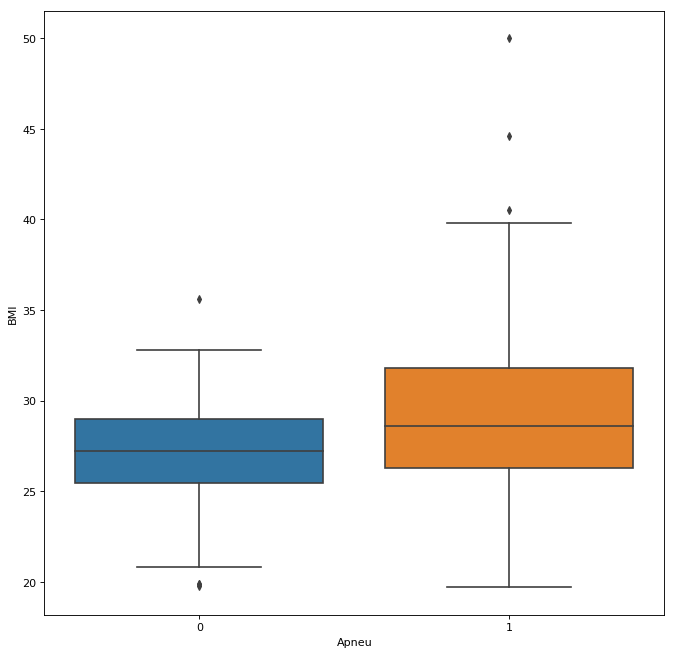

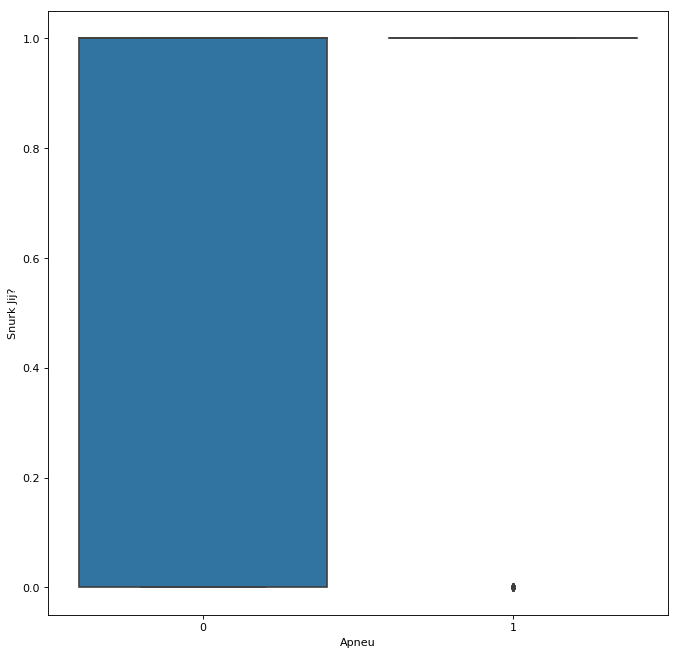

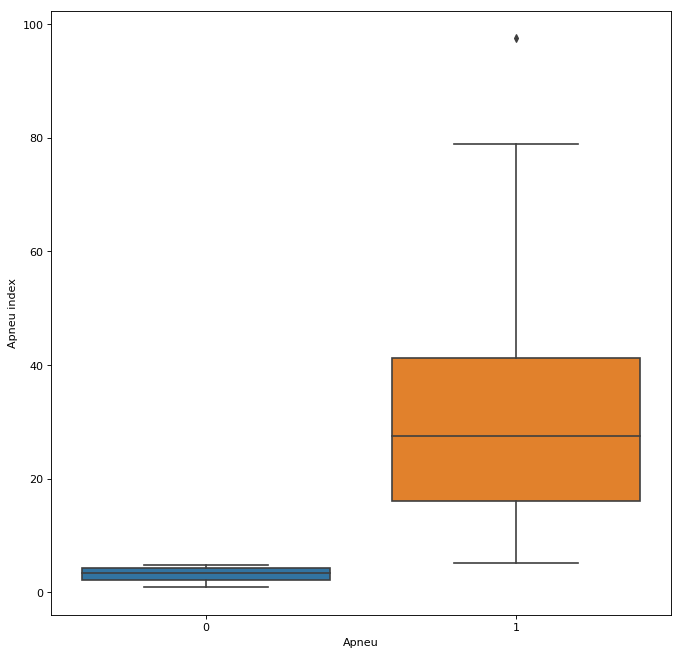

In [0]:
#boxplots en gemiddelde met standaardvar om verschil te zien apneu - niet apneu verschillende features
def boxplots(dfApneu):
    for y in ["Leeftijd","Lengte","Gewicht","BMI","Snurk Jij?","Apneu index"]:
        plt.figure(figsize=(10,10), dpi = 80)
        sns.boxplot(x="Apneu", y=y, data=dfApneu)
        plt.show()
boxplots(dfApneu)


In [0]:
df_apneu = dfApneu.loc[df['Apneu'] == 1]
df_geen_apneu = dfApneu.loc[df['Apneu'] == 0]

print(len(df_apneu))
print(len(df_geen_apneu))

def outliers_iqr(ys):
    quartile_1, quartile_3 = numpy.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    print(numpy.where((ys > upper_bound) | (ys < lower_bound)))
for y in ["Leeftijd","Lengte","Gewicht","BMI","Apneu index"]:
    outliers_iqr(df_geen_apneu[y])

109
22
(array([7]),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([10, 12, 13, 20]),)
(array([], dtype=int64),)


In [0]:
#outlier removal
dfApneu = dfApneu[dfApneu.BMI != 19.8]
dfApneu = dfApneu[dfApneu.BMI != 20.8]
dfApneu = dfApneu[dfApneu.BMI != 19.9]
dfApneu = dfApneu[dfApneu.BMI != 35.6]
dfApneu = dfApneu[dfApneu.BMI != 40.5]
dfApneu = dfApneu[dfApneu.BMI != 44.6]
dfApneu = dfApneu[dfApneu.BMI != 50]
dfApneu = dfApneu[dfApneu.Leeftijd != 84]
dfApneu = dfApneu[dfApneu.Leeftijd != 71]
dfApneu = dfApneu[dfApneu.Leeftijd != 59]
dfApneu = dfApneu[dfApneu.Leeftijd != 19]
dfApneu = dfApneu[dfApneu.Gewicht != 61]
dfApneu = dfApneu[dfApneu['Apneu index'] != 97.5]
dfApneu = dfApneu[dfApneu['Apneu index'] != 74.8]
dfApneu = dfApneu[dfApneu['Apneu index']!= 78.3]
dfApneu = dfApneu[dfApneu['Apneu index'] != 78.9]

In [0]:
dfApneu

Lijst  M=0-V=1  Leeftijd  Lengte  Gewicht   BMI  Snurk Jij?  \
0        3        0      57.0   185.0     75.0  21.9           1   
1        4        0      53.0   163.0     89.0  33.5           1   
2        5        0      56.0   185.0     96.0  28.0           1   
3        6        0      32.0   179.0    105.0  32.8           1   
4        8        1      49.0   174.0     92.0  30.4           1   
5        9        1      38.0   151.0     90.0  39.5           1   
6       10        1      49.0   175.0     63.0  20.6           1   
7       12        0      56.0   186.0     68.0  19.7           1   
8       13        0      47.0   180.0     84.0  25.9           1   
9       14        1      45.0   170.0     80.0  27.7           1   
10      15        1      38.0   170.0     90.0  31.1           1   
11      16        0      48.0   180.0     80.0  24.7           1   
12      17        1      46.0   156.0     73.0  30.4           1   
13      18        0      63.0   168.0     75.0  26.6           1   
14      19        1      39.0   162.0     83.0  31.6           1   
15      20        1      75.0   150.0     76.0  33.8           1   
16      21        1      55.0   161.0     85.0  32.8           1   
17      22        0      45.0   153.0     65.0  27.8           0   
18      23        0      61.0   180.0     73.0  22.5           1   
19      25        0      41.0   179.0     77.0  24.0           1   
20      26        0      75.0   167.0     80.0  28.7           1   
21      27        1      72.0   167.0     70.0  28.7           0   
22      28        0      52.0   162.0     77.0  29.3           1   
23      29        0      34.0   167.0     85.0  27.4           1   
24      30        1      53.0   169.0     96.0  33.6           1   
25      31        0      60.0   183.0     97.0  29.0           1   
26      32        0      55.0   187.0     95.0  27.2           1   
27      33        0      24.0   187.0    100.0  28.6           1   
28      36        0      67.0   175.0     76.0  24.8           1   
29      37        0      41.0   170.0     60.0  20.8           1   
..     ...      ...       ...     ...      ...   ...         ...   
101    111        1      56.0   160.0     53.0  20.7           1   
102    112        0      52.0   185.0    100.0  29.2           1   
103    113        1      32.0   155.0     61.0  25.4           0   
104    115        0      36.0   180.0     83.0  25.6           0   
105    116        1      62.0   167.0     72.0  25.8           1   
106    117        0      31.0   176.0     91.0  29.4           0   
107    118        1      63.0   169.0     83.0  29.1           1   
108    119        0      62.0   174.0     95.0  31.4           1   
109    121        0      49.0   183.0    118.0  35.2           1   
110    122        0      39.0   170.0     94.0  32.5           1   
111    123        1      36.0   172.0     84.0  28.3           1   
112    124        1      60.0   163.0     73.0  27.5           1   
113    125        1      55.0   170.0     66.0  22.8           1   
114    126        1      56.0   153.0     63.0  26.9           1   
115    127        1      59.0   160.0     77.0  30.1           0   
116    128        1      48.0   152.0     62.0  26.8           1   
117    129        0      36.0   176.0     73.0  23.6           1   
118    130        0      27.0   187.0    100.0  28.6           1   
119    131        0      50.0   179.0     75.0  23.4           1   
120    132        1      41.0   150.0     84.0  37.3           1   
121    133        0      58.0   165.0     89.0  32.7           1   
122    134        0      50.0   178.0    100.0  31.6           0   
123    135        0      77.0   167.0     96.0  34.4           0   
124    136        1      33.0   164.0     82.0  30.5           1   
125    138        1      19.0   164.0     75.0  27.9           0   
126    139        0      72.0   153.0     72.0  30.8           1   
127    140        1      54.0   163.0     65.0  24.5         

M=0-V=1


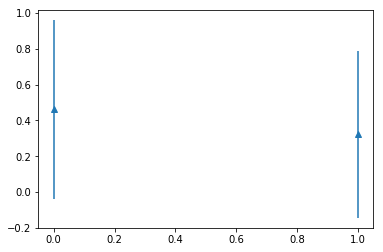

Leeftijd


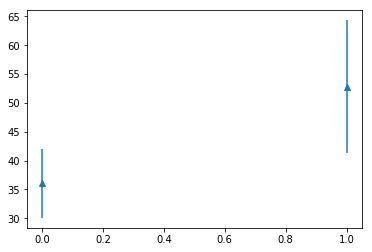

Lengte


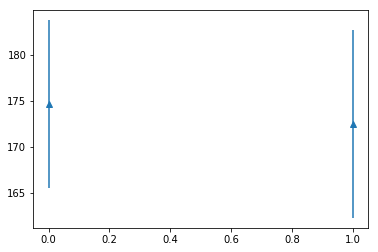

Gewicht


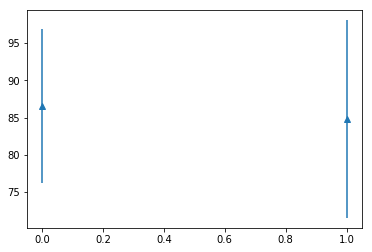

BMI


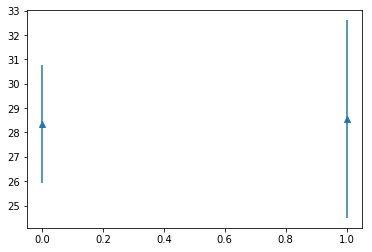

Snurk Jij?


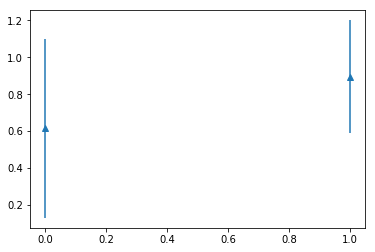

Luidheid snurken


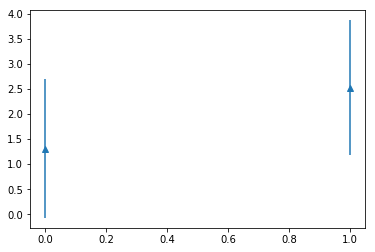

Hoe vaak snurken


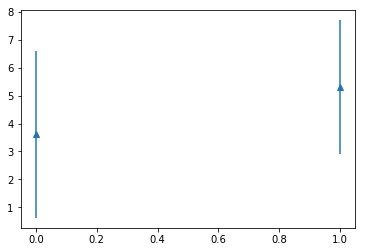

Snurken andere mensen storen


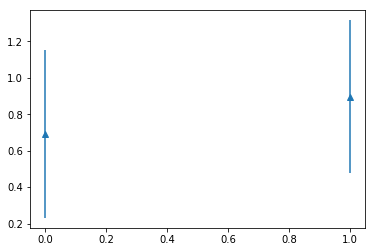

Aantal keer stoppen ademen


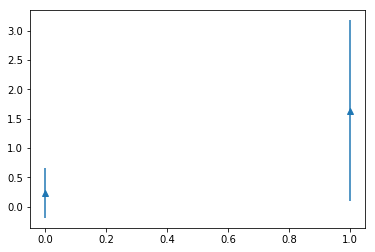

Aantal keer opstaan vermoeid


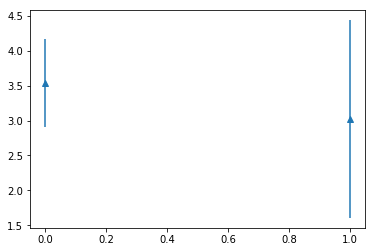

Aantal dagen vermoeid


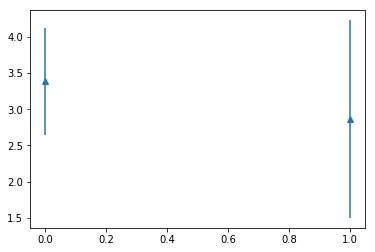

Inslapen tijdens besturen auto


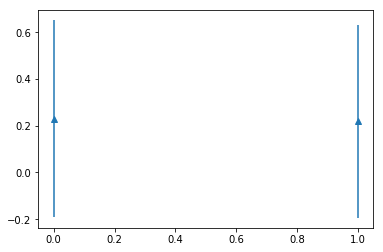

Hoge bloeddruk


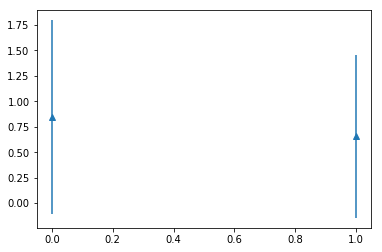

Kans slaperig tijdens zitten en lezen 


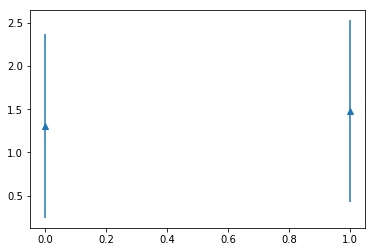

Kans slaperig tijdens televisie kijken


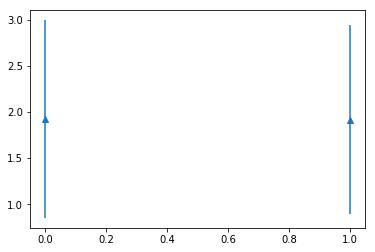

Kans slaperig zitten openbare instelling


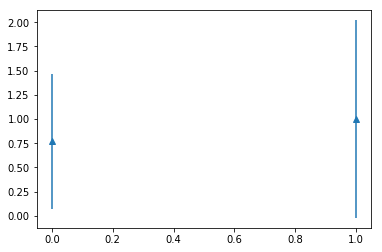

Kans slaperig zittend langer dan 1 uur als passagier 


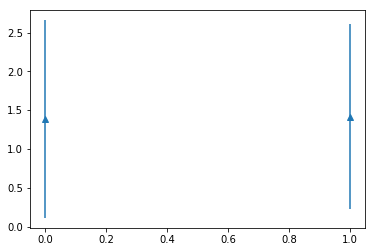

Kans slaperig tijdens rust namiddag


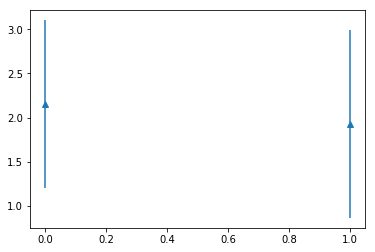

Kans slaperig zitten en praten


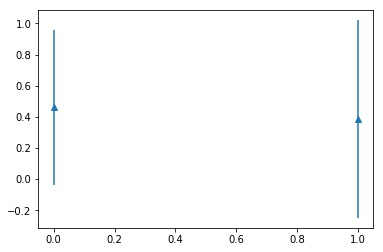

Kans slaperig na de lunch


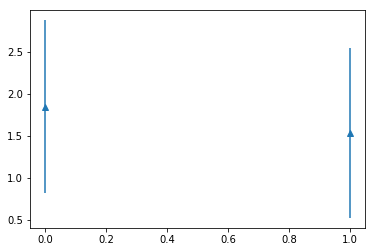

Kans slaperig in de auto in een file


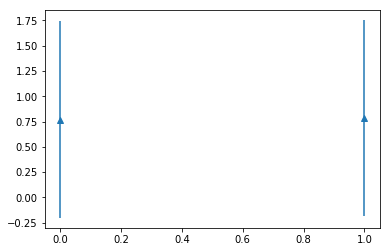

In [0]:
#gemiddelde en stdv van features apneu-niet apneu
import matplotlib.pyplot as plt
import numpy as np
df_apneu = dfApneu.loc[df['Apneu'] == 1]
df_geen_apneu = dfApneu.loc[df['Apneu'] == 0]
for y in list(X.columns.values):   
    x_leeftijd= df_apneu[y]
    y_leeftijd= df_geen_apneu[y]


    x_leeftijd = x_leeftijd.values
        
    x_leeftijd = x_leeftijd.astype(np.float)
    x_leeftijd= x_leeftijd[~numpy.isnan(x_leeftijd)]


    y_leeftijd = y_leeftijd.values
    y_leeftijd =y_leeftijd.astype(np.float)
        
    y_leeftijd= y_leeftijd[~numpy.isnan(y_leeftijd)]
    
    print(y)
    x = np.array([0, 1])
    y = np.array([y_leeftijd.mean(), x_leeftijd.mean()]) # gem
    e = np.array([y_leeftijd.std(), x_leeftijd.std()]) #stdv

    plt.errorbar(x, y, e, linestyle='None', marker='^')

    plt.show()

In [0]:
#Wil zeker zijn dat verschil boxplots/gemiddelde apneu-niet apneu niet door toeval is 
#indien p≤0,05, dan is de kans dat het gevonden resultaat aan het toeval te wijten is kleiner of gelijk aan 5%.
def pvalue():
   
    for y in list(X.columns.values):             
        x_leeftijd= df_apneu[y]
        y_leeftijd= df_geen_apneu[y]

        x_leeftijd = x_leeftijd.values
        x_leeftijd = x_leeftijd.astype(np.float)

        y_leeftijd = y_leeftijd.values
        y_leeftijd =y_leeftijd.astype(np.float)
       
        p=scipy.stats.mannwhitneyu(x_leeftijd, y_leeftijd)
        if p.pvalue < 0.05:
            print(y) 
            print (p)
pvalue()

M=0-V=1
MannwhitneyuResult(statistic=908.5, pvalue=0.017249316732844591)
Leeftijd
MannwhitneyuResult(statistic=428.5, pvalue=1.0525250556574172e-06)
Snurk Jij?
MannwhitneyuResult(statistic=808.0, pvalue=0.00016635803014987432)
Luidheid snurken
MannwhitneyuResult(statistic=575.0, pvalue=4.3396068722906491e-05)
Hoe vaak snurken
MannwhitneyuResult(statistic=919.0, pvalue=0.036361758625373435)
Snurken andere mensen storen
MannwhitneyuResult(statistic=775.5, pvalue=0.00017787709877799515)
Aantal keer stoppen ademen
MannwhitneyuResult(statistic=604.0, pvalue=6.7535916891091937e-05)
Kans slaperig na de lunch
MannwhitneyuResult(statistic=935.5, pvalue=0.046638638476561474)


# Classifiers


In [0]:
dfApneu

Lijst  M=0-V=1  Leeftijd  Lengte  Gewicht  BMI  Snurk Jij?  \
0        3        0        57     185       75   21           1   
1        4        0        53     163       89   33           1   
2        5        0        56     185       96   28           1   
3        6        0        32     179      105   32           1   
4        8        1        49     174       92   30           1   
5        9        1        38     151       90   39           1   
6       10        1        49     175       63   20           1   
7       12        0        56     186       68   19           1   
8       13        0        47     180       84   25           1   
9       14        1        45     170       80   27           1   
10      15        1        38     170       90   31           1   
11      16        0        48     180       80   24           1   
12      17        1        46     156       73   30           1   
13      18        0        63     168       75   26           1   
14      19        1        39     162       83   31           1   
15      20        1        75     150       76   33           1   
16      21        1        55     161       85   32           1   
17      22        0        45     153       65   27           0   
18      23        0        61     180       73   22           1   
19      25        0        41     179       77   24           1   
20      26        0        75     167       80   28           1   
21      27        1        72     167       70   28           0   
22      28        0        52     162       77   29           1   
23      29        0        34     167       85   27           1   
24      30        1        53     169       96   33           1   
25      31        0        60     183       97   29           1   
26      32        0        55     187       95   27           1   
27      33        0        24     187      100   28           1   
28      36        0        67     175       76   24           1   
29      37        0        41     170       60   20           1   
..     ...      ...       ...     ...      ...  ...         ...   
101    111        1        56     160       53   20           1   
102    112        0        52     185      100   29           1   
103    113        1        32     155       61   25           0   
104    115        0        36     180       83   25           0   
105    116        1        62     167       72   25           1   
106    117        0        31     176       91   29           0   
107    118        1        63     169       83   29           1   
108    119        0        62     174       95   31           1   
109    121        0        49     183      118   35           1   
110    122        0        39     170       94   32           1   
111    123        1        36     172       84   28           1   
112    124        1        60     163       73   27           1   
113    125        1        55     170       66   22           1   
114    126        1        56     153       63   26           1   
115    127        1        59     160       77   30           0   
116    128        1        48     152       62   26           1   
117    129        0        36     176       73   23           1   
118    130        0        27     187      100   28           1   
119    131        0        50     179       75   23           1   
120    132        1        41     150       84   37           1   
121    133        0        58     165       89   32           1   
122    134        0        50     178      100   31           0   
123    135        0        77     167       96   34           0   
124    136        1        33     164       82   30           1   
125    138        1        19     164       75   27           0   
126    139        0        72     153       72   30           1   
127    140        1        54     163       65   24           1   
128    141        1        47     166       98   35 

In [0]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
#oversampling met SMOTENC
X= dfApneu.drop(['Apneu index', 'Apneu','Lijst'], axis=1)
X_oneH= dfApneu_oneH.drop(['Apneu index', 'Apneu','Lijst',"Hoge bloeddruk_3"], axis=1)
Y=  dfApneu.loc[:,"Apneu"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)
X_train_oneH, X_test_oneH, y_train_oneH, y_test_oneH = train_test_split(X_oneH, Y, test_size=0.3, random_state=0, stratify=Y)
a = [1,2,3,4]
b = numpy.ones(73, dtype=bool)
b[a] = False
sm = SMOTENC( categorical_features=b)
X_res, y_res = sm.fit_resample(X_train_oneH, y_train_oneH)
X_resampled = pd.DataFrame(X_res)
Y_resampled = pd.DataFrame(y_res)
X_resampled.columns = X_oneH.columns

X_resampled=numpy.round(X_resampled)
X_resampled

M=0-V=1  Leeftijd  Lengte  Gewicht   BMI  Snurk Jij?  \
0        1.0      44.0   163.0     70.0  26.0         1.0   
1        0.0      27.0   187.0    100.0  28.0         1.0   
2        0.0      54.0   186.0     98.0  28.0         1.0   
3        0.0      53.0   163.0     89.0  33.0         1.0   
4        1.0      59.0   160.0     77.0  30.0         0.0   
5        0.0      41.0   179.0     77.0  24.0         1.0   
6        1.0      62.0   157.0     83.0  33.0         0.0   
7        0.0      57.0   185.0     75.0  21.0         1.0   
8        0.0      24.0   187.0    100.0  28.0         1.0   
9        1.0      55.0   163.0     65.0  24.0         1.0   
10       1.0      51.0   160.0     95.0  37.0         1.0   
11       1.0      53.0   170.0     74.0  25.0         1.0   
12       1.0      45.0   170.0     80.0  27.0         1.0   
13       0.0      73.0   183.0     78.0  23.0         1.0   
14       0.0      48.0   170.0     85.0  29.0         1.0   
15       0.0      56.0   185.0     96.0  28.0         1.0   
16       0.0      56.0   186.0     68.0  19.0         1.0   
17       1.0      34.0   165.0     73.0  26.0         0.0   
18       0.0      49.0   183.0    118.0  35.0         1.0   
19       1.0      19.0   164.0     75.0  27.0         0.0   
20       0.0      41.0   170.0     60.0  20.0         1.0   
21       0.0      50.0   179.0     75.0  23.0         1.0   
22       0.0      43.0   173.0     83.0  27.0         0.0   
23       1.0      49.0   174.0     92.0  30.0         1.0   
24       1.0      46.0   156.0     73.0  30.0         1.0   
25       0.0      48.0   182.0    105.0  31.0         1.0   
26       0.0      59.0   174.0     60.0  19.0         1.0   
27       1.0      48.0   152.0     62.0  26.0         1.0   
28       1.0      49.0   175.0     63.0  20.0         1.0   
29       0.0      35.0   192.0     99.0  26.0         1.0   
..       ...       ...     ...      ...   ...         ...   
122      1.0      40.0   179.0     81.0  25.0         1.0   
123      0.0      32.0   158.0     58.0  23.0         1.0   
124      1.0      38.0   182.0     80.0  23.0         0.0   
125      1.0      36.0   180.0     82.0  25.0         0.0   
126      1.0      38.0   162.0     59.0  22.0         0.0   
127      1.0      59.0   174.0     60.0  19.0         0.0   
128      0.0      44.0   164.0     66.0  24.0         0.0   
129      0.0      31.0   167.0     78.0  28.0         1.0   
130      0.0      34.0   166.0     74.0  26.0         0.0   
131      0.0      43.0   167.0     58.0  20.0         0.0   
132      1.0      30.0   175.0     90.0  29.0         0.0   
133      1.0      31.0   175.0     87.0  28.0         0.0   
134      1.0      43.0   167.0     59.0  20.0         0.0   
135      0.0      32.0   158.0     58.0  23.0         0.0   
136      0.0      43.0   166.0     60.0  21.0         1.0   
137      1.0      31.0   175.0     87.0  28.0         1.0   
138      0.0      42.0   167.0     57.0  20.0         0.0   
139      0.0      39.0   162.0     83.0  31.0         0.0   
140      1.0      35.0   184.0     83.0  24.0         1.0   
141      0.0      41.0   168.0     83.0  29.0         0.0   
142      1.0      33.0   163.0     53.0  19.0         1.0   
143      1.0      39.0   163.0     62.0  23.0         1.0   
144      0.0      36.0   181.0     82.0  25.0         0.0   
145      0.0      25.0   187.0     99.0  28.0         0.0   
146      0.0      45.0   164.0     81.0  30.0         1.0   
147      1.0      33.0   162.0     54.0  20.0         1.0   
148      1.0      37.0   163.0     59.0  22.0         1.0   
149      1.0      42.0   175.0     82.0  26.0         0.0   
150      1.0      24.0   169.0     76.0  26.0         1.0   
151      0.0      46.0   165.0     90.0  32.0         1.0   

     Snurken andere mensen storen  Luidheid snurken_0  Luidheid snurken_1  \
0                             1.0                 0.0                 0.0   
1                             1.0                 0.0               

In [0]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import precision_score
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score
fpr_vals = {}
tpr_vals = {}
conf_mat_vals = {}
scoring = {'AUC Score': 'roc_auc', 'Precision': make_scorer(precision_score),
           'recall': 'recall', 'F1 Score': 'f1'}
def plot_validation_curve(model, X, y, param, param_values, scoring=scoring):
    plt.figure()
    train_scores, valid_scores = validation_curve(model, X, y, param, param_values, scoring=scoring)
    train_scores_mean = numpy.mean(train_scores, axis=1)
    test_scores_mean = numpy.mean(valid_scores, axis=1)
    plt.plot(param_values, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
    plt.plot(param_values, test_scores_mean, label="Test score",
             color="blue", lw=2)
    plt.title("Validation Curve")
    plt.xlabel(param)
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.show()
def plot_roc_curve(y_test, y_prob):
    fpr, tpr,t = roc_curve(y_test.ravel(), y_prob[:,1].ravel())
    fpr_vals["data"] = fpr
    tpr_vals["data"] = tpr
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def plot_conf_mat(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
   
    TN=cm[0,0]
    TP=cm[1,1]
    FN=cm[1,0]
    FP=cm[0,1]
    sensitivity=TP/float(TP+FN)
    specificity=TN/float(TN+FP)
  
    print('\n','TN = ',TN,'\n','TP = ',TP,'\n','FN = ',FN,'\n','FP = ',FP,'\n','precision = TP/(TP+FP) = ',TP/float(TP+FP),'\n','The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

    'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

    'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

    'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

    'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

    'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

    'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

    'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
    

def plot_learning_curve(X, y, model, scoring=scoring):
    #http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring=scoring)
    plt.figure()
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_scores_mean = numpy.mean(train_scores, axis=1)
    train_scores_std = numpy.std(train_scores, axis=1)
    test_scores_mean = numpy.mean(test_scores, axis=1)
    test_scores_std = numpy.std(test_scores, axis=1)
    plt.grid(True)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
   

def print_results(model,X,y,y_predictions,y_test,y_pred,scoring=scoring):
    report = classification_report( y_test, y_predictions )
    print(report)  
    plot_conf_mat(y_test,y_predictions)
    plot_learning_curve(X_train, y_train, grid_search.best_estimator_, scoring=scoring)
    plot_roc_curve(y_test, y_pred)
    ap = average_precision_score(y_test, y_predictions)
    plot_precision_recall(y_test, y_predictions,ap)
    
def plot_precision_recall(y_test, prob, ap):
    precision, recall, thr = precision_recall_curve(y_test, prob)

    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b', label="average precision: %0.2f" % ap)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve:')
    plt.legend(loc="best")

# LOGITSTIC REGRESSION


Logistic Regression 
Best recall : 0.9310777960099228
Best parameters:
 {'logisticregression__C': 0.001, 'logisticregression__penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.86      0.97      0.91        33

   micro avg       0.85      0.85      0.85        40
   macro avg       0.77      0.63      0.66        40
weighted avg       0.83      0.85      0.82        40


 TN =  2 
 TP =  32 
 FN =  1 
 FP =  5 
 precision = TP/(TP+FP) =  0.8648648648648649 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.85 
 The Missclassification = 1-Accuracy =  0.15000000000000002 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.8648648648648649 
 Negative predictive Value = TN/(TN+FN) =  0.6666666666666666 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity

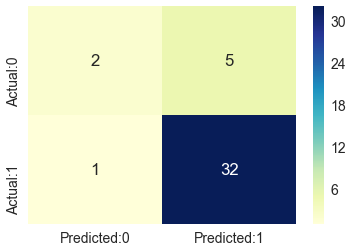

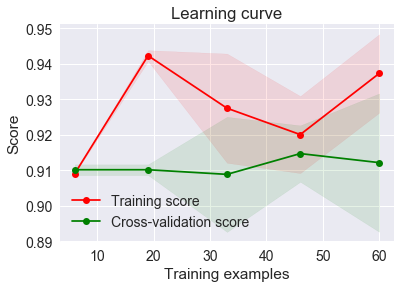

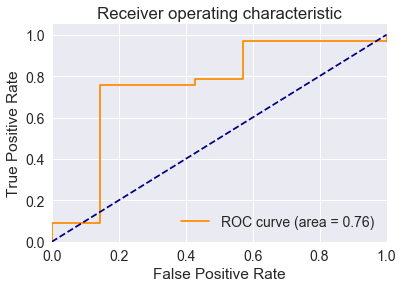

CPU times: user 8.65 s, sys: 367 ms, total: 9.02 s
Wall time: 5.19 s


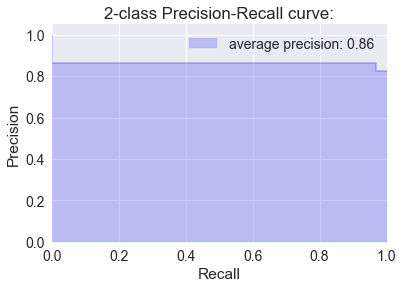

In [0]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, MaxAbsScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import GaussianNB

from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours

from collections import Counter
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from pandas_ml import ConfusionMatrix
from sklearn.metrics import precision_recall_curve
print('Logistic Regression ')
param_grid = {'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10, 100],
              "logisticregression__penalty": ["l1", "l2"]}

pipe_lr = make_imb_pipeline(PolynomialFeatures(interaction_only=True),LogisticRegression(random_state=42))

grid_search = GridSearchCV(pipe_lr, param_grid, cv=10, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)

y_pred= grid_search.predict_proba(X_test)

print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1")

Logistic Regression oneHot 
Best recall : 0.92461367189874
Best parameters:
 {'logisticregression__C': 0.001, 'logisticregression__penalty': 'l1'}
              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.87      1.00      0.93        33

   micro avg       0.88      0.88      0.88        40
   macro avg       0.93      0.64      0.69        40
weighted avg       0.89      0.88      0.84        40


 TN =  2 
 TP =  33 
 FN =  0 
 FP =  5 
 precision = TP/(TP+FP) =  0.868421052631579 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.875 
 The Missclassification = 1-Accuracy =  0.125 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  1.0 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.868421052631579 
 Negative predictive Value = TN/(TN+FN) =  1.0 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.4 
 Negative likelihood Ratio = (

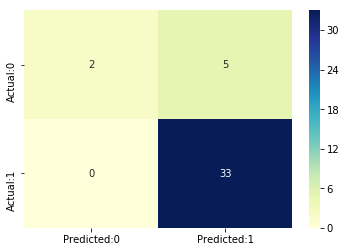

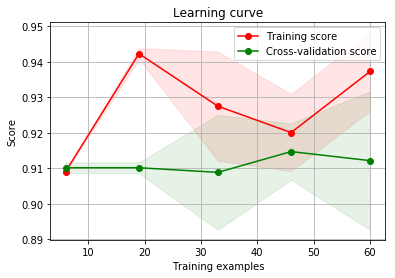

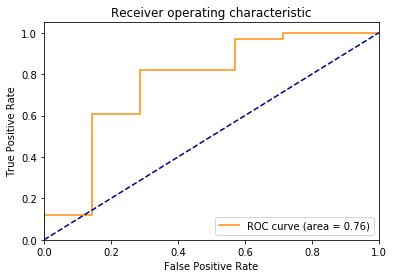

CPU times: user 29.6 s, sys: 882 ms, total: 30.5 s
Wall time: 17.5 s


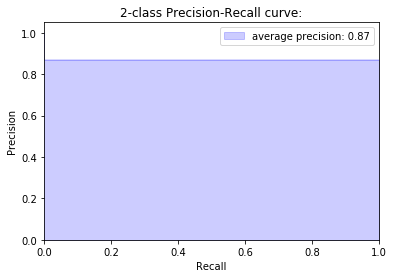

In [0]:
%%time
print('Logistic Regression oneHot ')
param_grid = {'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10, 100],
             "logisticregression__penalty": ["l1", "l2"]}

pipe_lr = make_imb_pipeline(PolynomialFeatures(interaction_only=True),LogisticRegression(random_state=42))

grid_search = GridSearchCV(pipe_lr, param_grid, cv=10, scoring='f1')
grid_search.fit(X_train_oneH, y_train_oneH)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_oneH)

y_pred= grid_search.predict_proba(X_test_oneH)

print_results(grid_search.best_estimator_,X_train_oneH,y_train_oneH,y_predictions,y_test,y_pred,scoring="f1")

Logistic Regression with Feature Selection(selectPercentile:
Best recall : 0.9362623611094133
Best parameters:
 {'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.86      0.94      0.90        33

   micro avg       0.82      0.82      0.82        40
   macro avg       0.68      0.61      0.63        40
weighted avg       0.80      0.82      0.80        40


 TN =  2 
 TP =  31 
 FN =  2 
 FP =  5 
 precision = TP/(TP+FP) =  0.8611111111111112 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.825 
 The Missclassification = 1-Accuracy =  0.17500000000000004 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9393939393939394 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.8611111111111112 
 Negative predictive Value = TN/(TN+FN) =  0.5 
 Positive Likelihood Ratio = Sen

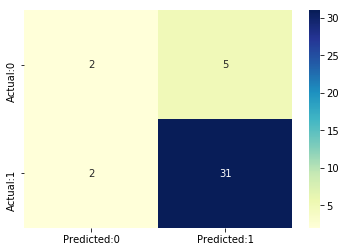

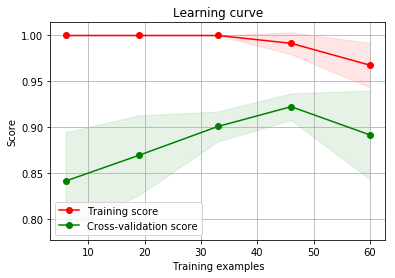

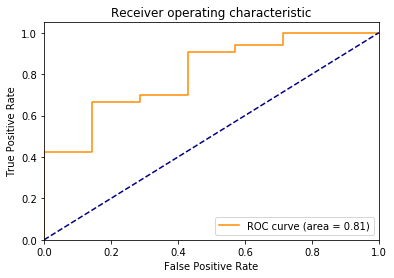

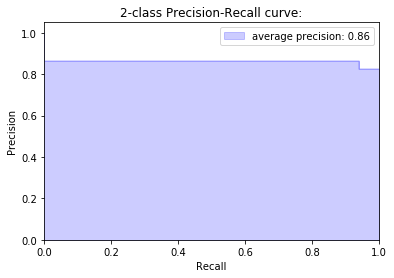

In [0]:
print('Logistic Regression with Feature Selection(selectPercentile:')
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, MaxAbsScaler
pipe_lr = make_imb_pipeline( SelectPercentile(score_func=f_classif, percentile=50),LogisticRegression())

grid_search = GridSearchCV(pipe_lr, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)

y_pred= grid_search.predict_proba(X_test)
print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1")

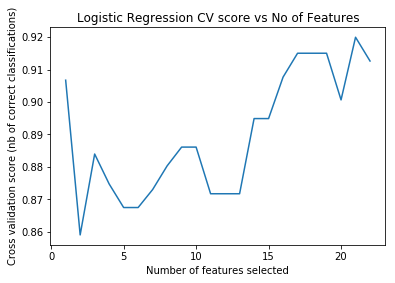

In [0]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier 

rfecv = RFECV(LogisticRegression(),scoring="f1")
rfecv.fit(X_train, y_train)

X_train_rfe= rfecv.transform(X_train)
X_test_rfe= rfecv.transform(X_test)

plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
feature_names= list(X_train.columns.values)

feature_importance = list(zip(feature_names, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
print(feature_names)  
print(len(feature_names))   
print(new_features)
print(len(new_features))

['M=0-V=1', 'Leeftijd', 'Lengte', 'Gewicht', 'BMI', 'Snurk Jij?', 'Luidheid snurken', 'Hoe vaak snurken', 'Snurken andere mensen storen', 'Aantal keer stoppen ademen', 'Aantal keer opstaan vermoeid', 'Aantal dagen vermoeid', 'Inslapen tijdens besturen auto', 'Hoge bloeddruk', 'Kans slaperig tijdens zitten en lezen ', 'Kans slaperig tijdens televisie kijken', 'Kans slaperig zitten openbare instelling', 'Kans slaperig zittend langer dan 1 uur als passagier ', 'Kans slaperig tijdens rust namiddag', 'Kans slaperig zitten en praten', 'Kans slaperig na de lunch', 'Kans slaperig in de auto in een file']
22
['M=0-V=1', 'Leeftijd', 'Lengte', 'Gewicht', 'BMI', 'Luidheid snurken', 'Hoe vaak snurken', 'Snurken andere mensen storen', 'Aantal keer stoppen ademen', 'Aantal keer opstaan vermoeid', 'Aantal dagen vermoeid', 'Inslapen tijdens besturen auto', 'Hoge bloeddruk', 'Kans slaperig tijdens zitten en lezen ', 'Kans slaperig tijdens televisie kijken', 'Kans slaperig zitten openbare instelling', 'K

Logistic Regression with RFE:
Best recall : 0.9310564435564435
Best parameters:
 {'logisticregression__C': 0.001, 'logisticregression__penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.86      0.97      0.91        33

   micro avg       0.85      0.85      0.85        40
   macro avg       0.77      0.63      0.66        40
weighted avg       0.83      0.85      0.82        40


 TN =  2 
 TP =  32 
 FN =  1 
 FP =  5 
 precision = TP/(TP+FP) =  0.8648648648648649 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.85 
 The Missclassification = 1-Accuracy =  0.15000000000000002 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.8648648648648649 
 Negative predictive Value = TN/(TN+FN) =  0.6666666666666666 
 Positive Likelihood Ratio = Sensitivity/(1-Sp

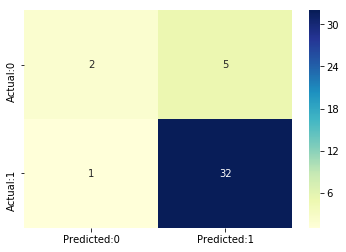

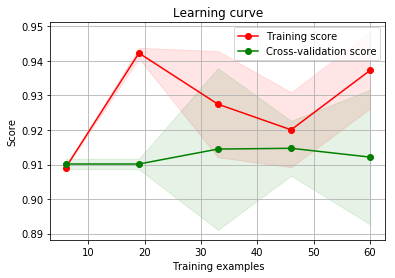

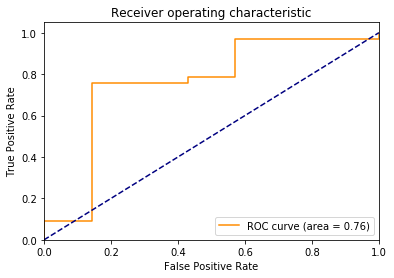

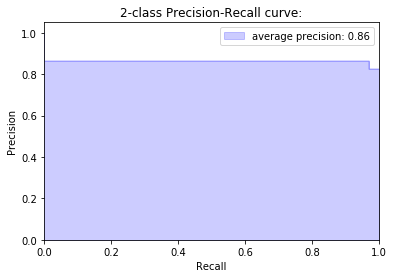

In [0]:
print('Logistic Regression with RFE:')

pipe_lr_rfe = make_imb_pipeline( PolynomialFeatures(interaction_only=True), LogisticRegression())


grid_search = GridSearchCV(pipe_lr_rfe, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_rfe, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_rfe)
y_pred= grid_search.predict_proba(X_test_rfe)
print_results(grid_search.best_estimator_,X_train_rfe,y_train,y_predictions,y_test,y_pred,scoring="f1")


In [0]:
pandas.set_option('display.max_rows', 1000)
pandas.set_option('display.max_columns', 1000)
X_resampled

M=0-V=1 Leeftijd   Lengte  Gewicht      BMI Snurk Jij?  \
0         1       44      163       70       26          1   
1         0       27      187      100       28          1   
2         0       54      186       98       28          1   
3         0       53      163       89       33          1   
4         1       59      160       77       30          0   
5         0       41      179       77       24          1   
6         1       62      157       83       33          0   
7         0       57      185       75       21          1   
8         0       24      187      100       28          1   
9         1       55      163       65       24          1   
10        1       51      160       95       37          1   
11        1       53      170       74       25          1   
12        1       45      170       80       27          1   
13        0       73      183       78       23          1   
14        0       48      170       85       29          1   
15        0       56      185       96       28          1   
16        0       56      186       68       19          1   
17        1       34      165       73       26          0   
18        0       49      183      118       35          1   
19        1       19      164       75       27          0   
20        0       41      170       60       20          1   
21        0       50      179       75       23          1   
22        0       43      173       83       27          0   
23        1       49      174       92       30          1   
24        1       46      156       73       30          1   
25        0       48      182      105       31          1   
26        0       59      174       60       19          1   
27        1       48      152       62       26          1   
28        1       49      175       63       20          1   
29        0       35      192       99       26          1   
30        0       50      178      100       31          0   
31        0       47      180       84       25          1   
32        0       45      176      102       32          1   
33        1       48      172       90       30          1   
34        1       56      159       70       27          1   
35        0       55      187       95       27          1   
36        1       54      165       92       33          1   
37        0       76      170       68       23          1   
38        0       36      176       73       23          1   
39        0       62      174       95       31          1   
40        1       53      169       96       33          1   
41        0       41      189       94       26          1   
42        0       34      167       85       27          1   
43        1       39      162       83       31          1   
44        1       71      150       71       31          0   
45        1       38      151       90       39          1   
46        0       35      188      117       33          1   
47        0       52      184       93       27          1   
48        1       41      150       84       37          1   
49        0       77      167       96       34          0   
50        0       45      153       65       27          0   
51        0       48      180       80       24          1   
52        0       75      167       80       28          1   
53        0       31      176       93       30          1   
54        1       36      172       84       28          1   
55        1       75      150       76       33          1   
56        0       38      183       79       23          0   
57        1       63      169       83       29          1   
58        1       62      167       72       25          1   
59        0       63      168       75       26          1   
60        1       33      163       53       19          0   
61        1       56      160       53       20          1   
62        1       60      157      110       44          1   
63        0       40      178      1

Logistic Regression with SMOTENC:
Best recall : 0.9019207124959122
Best parameters:
 {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.86      0.91      0.88        33

   micro avg       0.80      0.80      0.80        40
   macro avg       0.63      0.60      0.61        40
weighted avg       0.78      0.80      0.79        40


 TN =  2 
 TP =  30 
 FN =  3 
 FP =  5 
 precision = TP/(TP+FP) =  0.8571428571428571 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8 
 The Missclassification = 1-Accuracy =  0.19999999999999996 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9090909090909091 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.8571428571428571 
 Negative predictive Value = TN/(TN+FN) =  0.4 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) = 

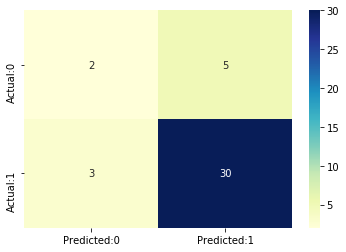

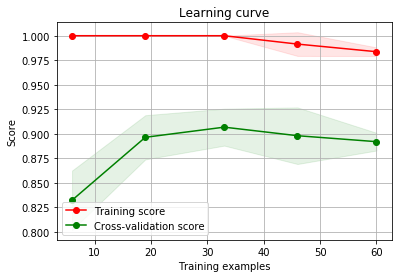

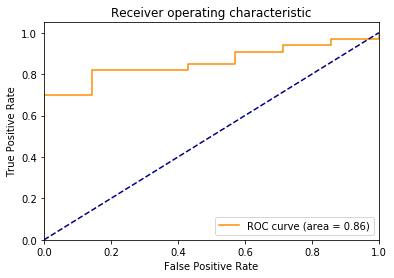

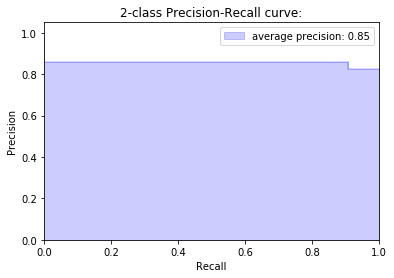

In [0]:
print('Logistic Regression with SMOTENC:')
param_grid = {'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10, 100],  "logisticregression__penalty": ["l1", "l2"]}

pipe_lr = make_imb_pipeline(PolynomialFeatures(interaction_only=True),LogisticRegression(random_state=42))

grid_search = GridSearchCV(pipe_lr, param_grid, cv=10, scoring='f1')
grid_search.fit(X_resampled, Y_resampled)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_oneH)

y_pred= grid_search.predict_proba(X_test_oneH)

print_results(grid_search.best_estimator_,X_resampled,Y_resampled,y_predictions,y_test,y_pred,scoring="f1")



# Naive Bayes (no tuning parameters)

GaussianNB:
Best recall : 0.9341359101727765
Best parameters:
 {}
              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.84      0.97      0.90        33

   micro avg       0.82      0.82      0.82        40
   macro avg       0.67      0.56      0.56        40
weighted avg       0.78      0.82      0.78        40


 TN =  1 
 TP =  32 
 FN =  1 
 FP =  6 
 precision = TP/(TP+FP) =  0.8421052631578947 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.825 
 The Missclassification = 1-Accuracy =  0.17500000000000004 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.14285714285714285 
 Positive Predictive value = TP/(TP+FP) =  0.8421052631578947 
 Negative predictive Value = TN/(TN+FN) =  0.5 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.1313131313131313 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.21

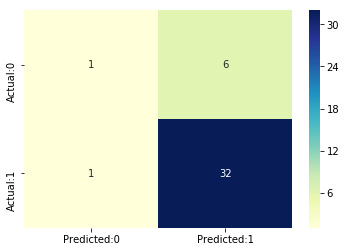

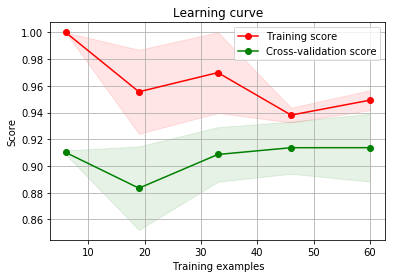

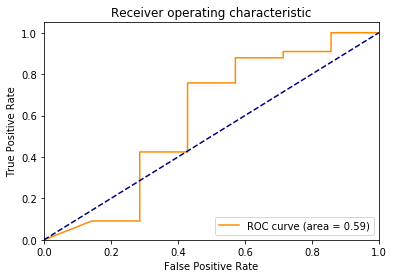

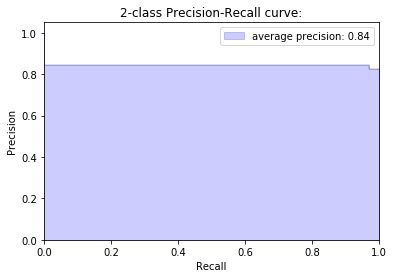

In [0]:
from sklearn.naive_bayes import GaussianNB

print('GaussianNB:')
param_grid = {}

pipe_nb = make_imb_pipeline( GaussianNB())

grid_search = GridSearchCV(pipe_nb, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)
y_pred= grid_search.predict_proba(X_test)
print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1")


GaussianNB oneH:
Best recall : 0.9119798642482578
Best parameters:
 {}
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         7
          1       0.81      0.91      0.86        33

avg / total       0.67      0.75      0.71        40


 TN =  0 
 TP =  30 
 FN =  3 
 FP =  7 
 precision = TP/(TP+FP) =  0.8108108108108109 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.75 
 The Missclassification = 1-Accuracy =  0.25 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9090909090909091 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.0 
 Positive Predictive value = TP/(TP+FP) =  0.8108108108108109 
 Negative predictive Value = TN/(TN+FN) =  0.0 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  0.9090909090909091 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  inf


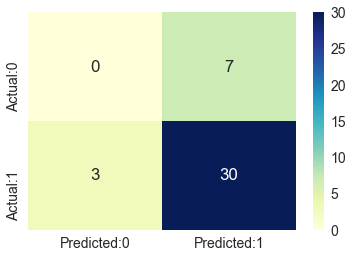

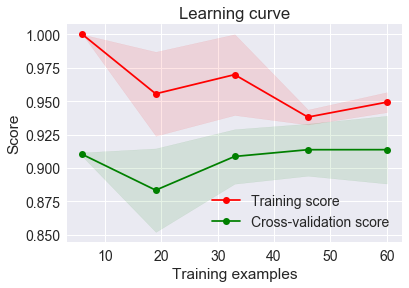

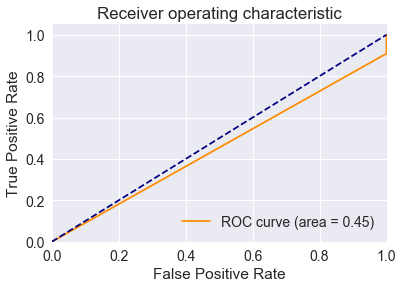

CPU times: user 620 ms, sys: 34.3 ms, total: 654 ms
Wall time: 703 ms


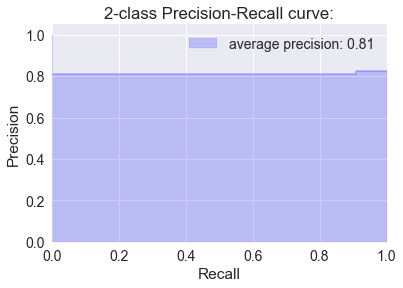

In [0]:
%%time
print('GaussianNB oneH:')
param_grid = {}

pipe_nb = make_imb_pipeline( GaussianNB())

grid_search = GridSearchCV(pipe_nb, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_oneH, y_train_oneH)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_oneH)
y_pred= grid_search.predict_proba(X_test_oneH)
print_results(grid_search.best_estimator_,X_train_oneH,y_train_oneH,y_predictions,y_test,y_pred,scoring="f1")


GaussianNB with boost:
Best recall : 0.4408805480234052
Best parameters:
 {'adaboostclassifier__n_estimators': 20}
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         7
          1       0.81      0.91      0.86        33

avg / total       0.67      0.75      0.71        40


 TN =  0 
 TP =  30 
 FN =  3 
 FP =  7 
 precision = TP/(TP+FP) =  0.8108108108108109 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.75 
 The Missclassification = 1-Accuracy =  0.25 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9090909090909091 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.0 
 Positive Predictive value = TP/(TP+FP) =  0.8108108108108109 
 Negative predictive Value = TN/(TN+FN) =  0.0 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  0.9090909090909091 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  inf


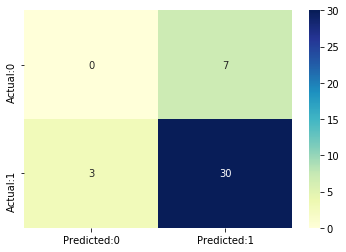

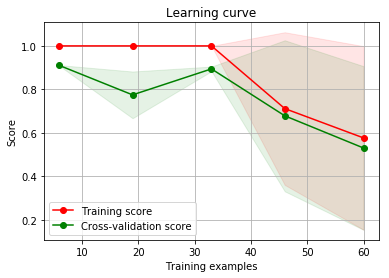

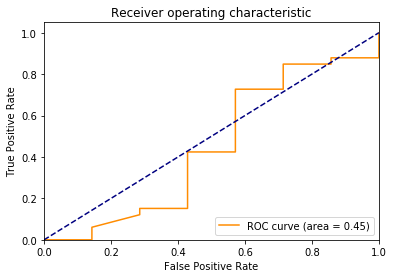

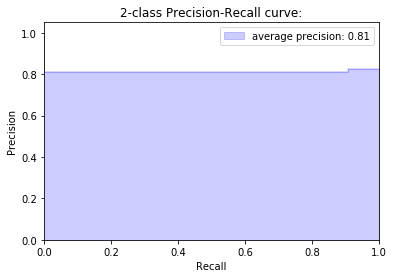

In [0]:
print('GaussianNB with boost:')
param_grid = {"adaboostclassifier__n_estimators": range(10,100,10), 
              }
pipe_nb = make_imb_pipeline(AdaBoostClassifier(GaussianNB()))
grid_search = GridSearchCV(pipe_nb, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)
y_pred= grid_search.predict_proba(X_test)
print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1")

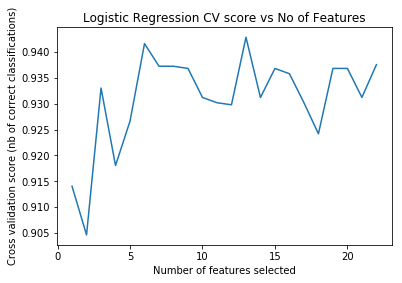

In [0]:
rfecv = RFECV(RandomForestClassifier(n_estimators=100, random_state=42),scoring='f1')
rfecv.fit(X_train, y_train)

X_train_rfe= rfecv.transform(X_train)
X_test_rfe= rfecv.transform(X_test)

plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
feature_names= list(X.columns.values)

feature_importance = list(zip(feature_names, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)
print(len(new_features))

['Leeftijd', 'Lengte', 'Gewicht', 'BMI', 'Snurk Jij?', 'Luidheid snurken', 'Hoe vaak snurken', 'Snurken andere mensen storen', 'Aantal keer stoppen ademen', 'Aantal dagen vermoeid', 'Hoge bloeddruk', 'Kans slaperig tijdens zitten en lezen ', 'Kans slaperig na de lunch']
13


GaussianNB with RFE:
Best recall : 0.9149231707431296
Best parameters:
 {}
              precision    recall  f1-score   support

           0       0.17      0.14      0.15         7
           1       0.82      0.85      0.84        33

   micro avg       0.72      0.72      0.73        40
   macro avg       0.50      0.50      0.49        40
weighted avg       0.71      0.72      0.72        40


 TN =  1 
 TP =  28 
 FN =  5 
 FP =  6 
 precision = TP/(TP+FP) =  0.8235294117647058 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.725 
 The Missclassification = 1-Accuracy =  0.275 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8484848484848485 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.14285714285714285 
 Positive Predictive value = TP/(TP+FP) =  0.8235294117647058 
 Negative predictive Value = TN/(TN+FN) =  0.16666666666666666 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  0.9898989898989898 
 Negative likelihood Ratio = (1-Sensitivity)/Specific

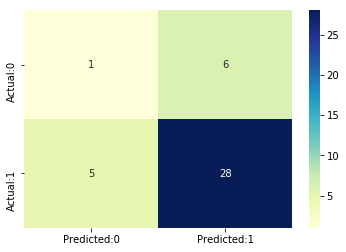

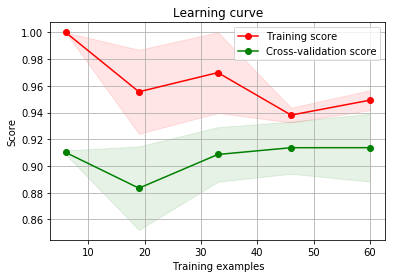

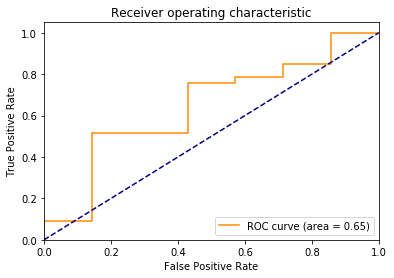

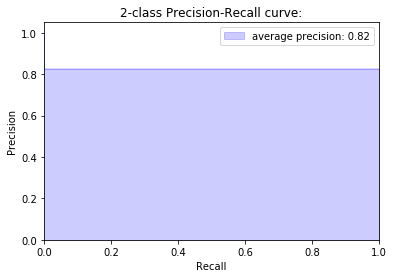

In [0]:
print('GaussianNB with RFE:')
param_grid = {}

pipe_nb = make_imb_pipeline( GaussianNB())

grid_search = GridSearchCV(pipe_nb, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_rfe, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_rfe)
y_pred= grid_search.predict_proba(X_test_rfe)
print_results(grid_search.best_estimator_,X_train_rfe,y_train,y_predictions,y_test,y_pred,scoring="f1")

GaussianNB with SMOTENC:
Best recall : 0.8592444740614077
Best parameters:
 {}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.82      0.97      0.89        33

   micro avg       0.80      0.80      0.80        40
   macro avg       0.41      0.48      0.44        40
weighted avg       0.68      0.80      0.73        40


 TN =  0 
 TP =  32 
 FN =  1 
 FP =  7 
 precision = TP/(TP+FP) =  0.8205128205128205 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8 
 The Missclassification = 1-Accuracy =  0.19999999999999996 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.0 
 Positive Predictive value = TP/(TP+FP) =  0.8205128205128205 
 Negative predictive Value = TN/(TN+FN) =  0.0 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  0.9696969696969697 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  inf


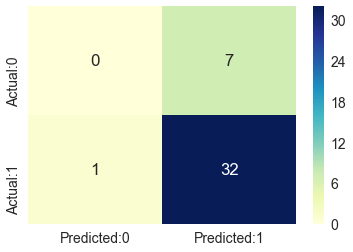

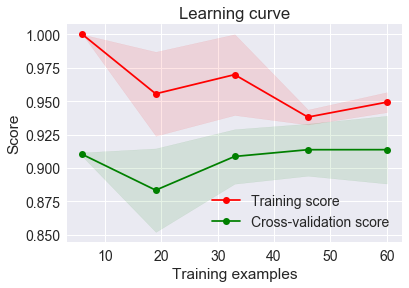

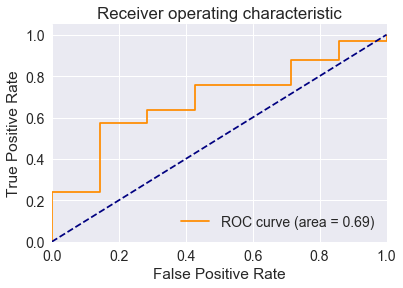

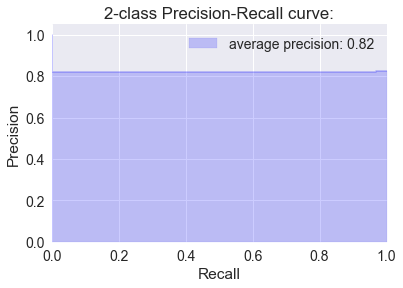

In [0]:
print('GaussianNB with SMOTENC:')
param_grid = {}

pipe_nb = make_imb_pipeline( GaussianNB())


grid_search = GridSearchCV(pipe_nb, param_grid, cv=10, scoring='f1')
grid_search.fit(X_resampled, Y_resampled)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_oneH)

y_pred= grid_search.predict_proba(X_test_oneH)

print_results(grid_search.best_estimator_,X_resampled,Y_resampled,y_predictions,y_test,y_pred,scoring="f1")

# DecisionTreeClassifier

Decision Tree :
Best recall : 0.9370299758476164
Best parameters:
 {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 2}
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         7
          1       0.82      0.97      0.89        33

avg / total       0.68      0.80      0.73        40


 TN =  0 
 TP =  32 
 FN =  1 
 FP =  7 
 precision = TP/(TP+FP) =  0.8205128205128205 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8 
 The Missclassification = 1-Accuracy =  0.19999999999999996 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.0 
 Positive Predictive value = TP/(TP+FP) =  0.8205128205128205 
 Negative predictive Value = TN/(TN+FN) =  0.0 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  0.9696969696969697 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  inf


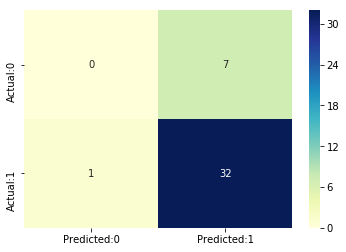

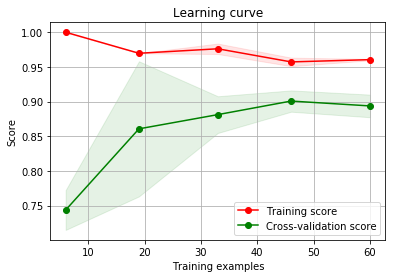

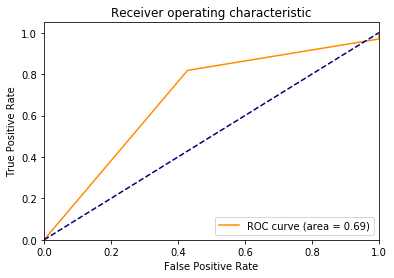

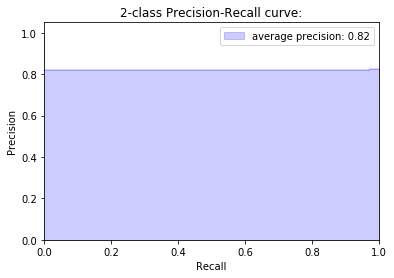

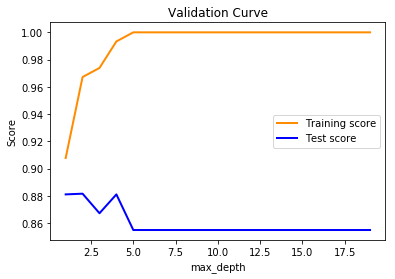

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.decomposition import PCA
print('Decision Tree :')
from sklearn.tree import DecisionTreeClassifier
param_grid = {'decisiontreeclassifier__criterion':['gini', 'entropy'],
              'decisiontreeclassifier__max_depth': range(1,20)
             }

pipe_Dtree = make_imb_pipeline(  DecisionTreeClassifier(random_state=42) 
                     )
                   
grid_search = GridSearchCV(pipe_Dtree , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)

          
y_pred= grid_search.predict_proba(X_test)


print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1")
plot_validation_curve(DecisionTreeClassifier(random_state=42), X_train,  y_train, 'max_depth', numpy.arange(1,20,1), scoring="recall")



Decision Tree met feature selection:
[0.875      0.75       1.         0.875      0.875      0.875
 1.         0.85714286 0.85714286 1.        ]
Best recall : 0.9472324910112928
Best parameters:
 {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__max_features': 0.9, 'decisiontreeclassifier__min_samples_leaf': 3, 'decisiontreeclassifier__min_samples_split': 2}
             precision    recall  f1-score   support

          0       0.40      0.29      0.33         7
          1       0.86      0.91      0.88        33

avg / total       0.78      0.80      0.79        40


 TN =  2 
 TP =  30 
 FN =  3 
 FP =  5 
 precision = TP/(TP+FP) =  0.8571428571428571 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8 
 The Missclassification = 1-Accuracy =  0.19999999999999996 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9090909090909091 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive P

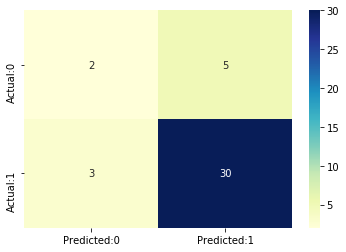

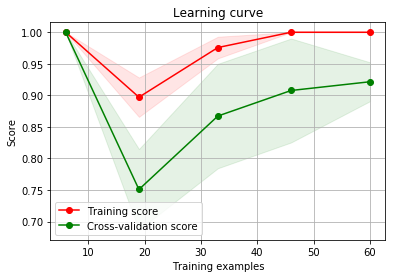

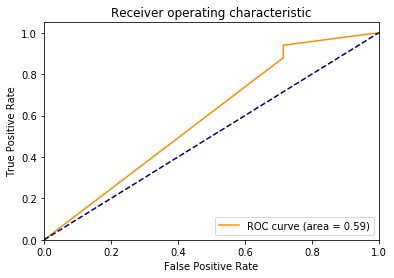

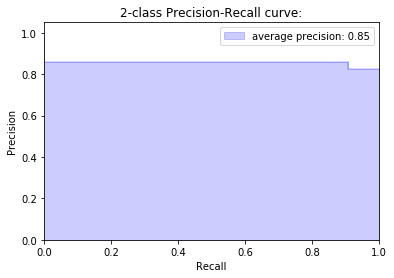

In [0]:
print('Decision Tree met feature selection(max_features param):')
from sklearn.tree import DecisionTreeClassifier
param_grid = {'decisiontreeclassifier__max_features': numpy.arange(0.1,1.0,0.1),'decisiontreeclassifier__criterion':['gini', 'entropy'],
              'decisiontreeclassifier__max_depth': numpy.arange(1,20,1), 'decisiontreeclassifier__min_samples_split': range(2, 21),
        'decisiontreeclassifier__min_samples_leaf': range(1, 21)}

pipe_tree = make_imb_pipeline( DecisionTreeClassifier(random_state=42))

grid_search = GridSearchCV(pipe_tree , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)
y_pred= grid_search.predict_proba(X_test)

print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1")

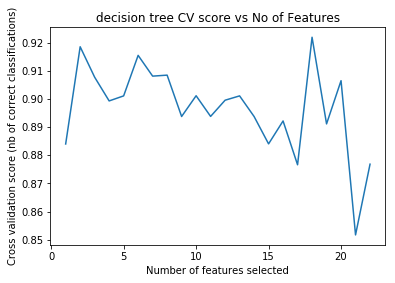

In [0]:
rfecv = RFECV(DecisionTreeClassifier(random_state=42),scoring='f1')
rfecv.fit(X_train, y_train)

X_train_rfe= rfecv.transform(X_train)
X_test_rfe= rfecv.transform(X_test)

plt.figure()
plt.title('decision tree CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
feature_names= list(X.columns.values)

feature_importance = list(zip(feature_names, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)
print(len(new_features))

['Leeftijd', 'Lengte', 'Gewicht', 'BMI', 'Snurk Jij?', 'Luidheid snurken', 'Hoe vaak snurken', 'Snurken andere mensen storen', 'Aantal keer stoppen ademen', 'Hoge bloeddruk', 'Kans slaperig tijdens zitten en lezen ', 'Kans slaperig tijdens televisie kijken', 'Kans slaperig zitten openbare instelling', 'Kans slaperig zittend langer dan 1 uur als passagier ', 'Kans slaperig tijdens rust namiddag', 'Kans slaperig zitten en praten', 'Kans slaperig na de lunch', 'Kans slaperig in de auto in een file']
18


Decision Tree met feature selection(rfe):
Best recall : 0.9442495360427049
Best parameters:
 {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__min_samples_leaf': 7, 'decisiontreeclassifier__min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.82      0.97      0.89        33

   micro avg       0.80      0.80      0.80        40
   macro avg       0.41      0.48      0.44        40
weighted avg       0.68      0.80      0.73        40


 TN =  0 
 TP =  32 
 FN =  1 
 FP =  7 
 precision = TP/(TP+FP) =  0.8205128205128205 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8 
 The Missclassification = 1-Accuracy =  0.19999999999999996 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.0 
 Positive Predictive value = TP/(TP+FP) =  0.8205128205128205 
 N

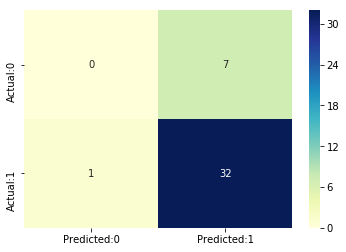

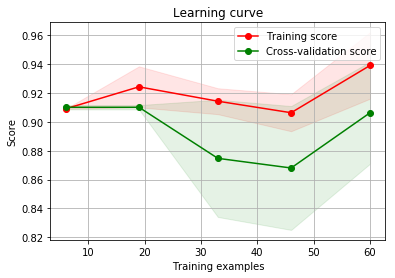

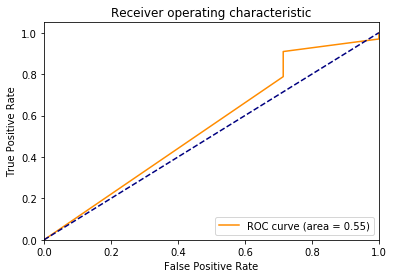

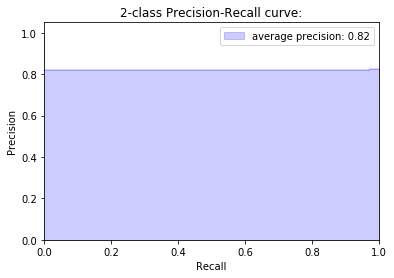

In [0]:
print('Decision Tree met feature selection(rfe):')
from sklearn.tree import DecisionTreeClassifier
param_grid = {'decisiontreeclassifier__criterion':['gini', 'entropy'],
              'decisiontreeclassifier__max_depth': numpy.arange(1,20,1), 'decisiontreeclassifier__min_samples_split': range(2, 21),
        'decisiontreeclassifier__min_samples_leaf': range(1, 21)}

pipe_tree = make_imb_pipeline( DecisionTreeClassifier(random_state=42))

grid_search = GridSearchCV(pipe_tree , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_rfe, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_rfe)
y_pred= grid_search.predict_proba(X_test_rfe)

print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1")



Boosted Decision Tree:
Best recall : 0.9557337823466857
Best parameters:
 {'adaboostclassifier__n_estimators': 50}
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.86      0.97      0.91        33

   micro avg       0.85      0.85      0.85        40
   macro avg       0.77      0.63      0.66        40
weighted avg       0.83      0.85      0.82        40


 TN =  2 
 TP =  32 
 FN =  1 
 FP =  5 
 precision = TP/(TP+FP) =  0.8648648648648649 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.85 
 The Missclassification = 1-Accuracy =  0.15000000000000002 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.8648648648648649 
 Negative predictive Value = TN/(TN+FN) =  0.6666666666666666 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.3575757575757577 
 N

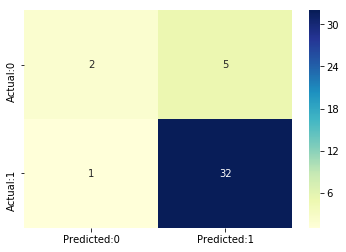

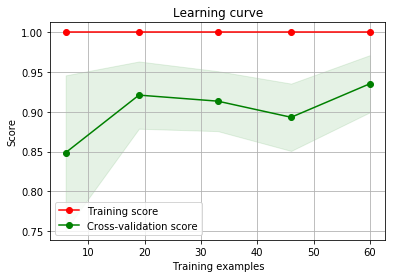

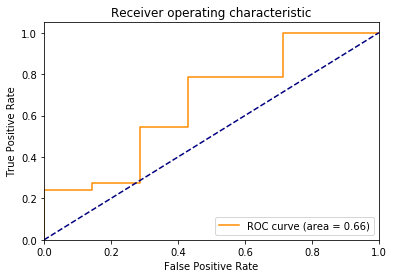

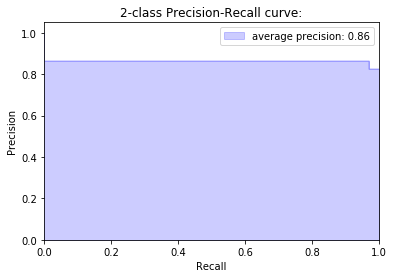

In [0]:
print('Boosted Decision Tree:')
from sklearn.ensemble import AdaBoostClassifier 
param_grid = {"adaboostclassifier__n_estimators": range(10,100,10), 
              }
pipe_treeBoost = make_imb_pipeline(
                              AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf= 3, min_samples_split= 2,criterion ='entropy', max_depth= 5),random_state=42))

grid_search = GridSearchCV(pipe_treeBoost , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)
 
y_pred= grid_search.predict_proba(X_test)

print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1")

Boosted Decision Tree with RFE:
Best recall : 0.9430265654648956
Best parameters:
 {'adaboostclassifier__n_estimators': 80}
             precision    recall  f1-score   support

          0       0.50      0.29      0.36         7
          1       0.86      0.94      0.90        33

avg / total       0.80      0.82      0.80        40


 TN =  2 
 TP =  31 
 FN =  2 
 FP =  5 
 precision = TP/(TP+FP) =  0.8611111111111112 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.825 
 The Missclassification = 1-Accuracy =  0.17500000000000004 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9393939393939394 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.8611111111111112 
 Negative predictive Value = TN/(TN+FN) =  0.5 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.3151515151515152 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.21212121212121193


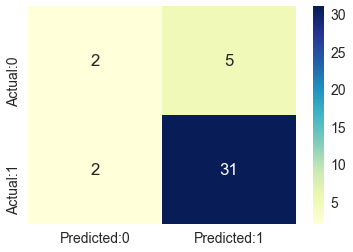

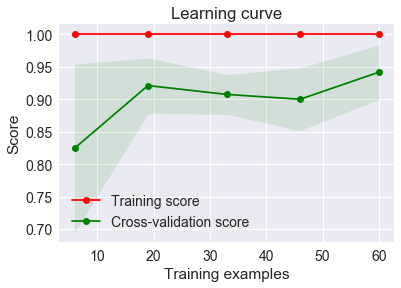

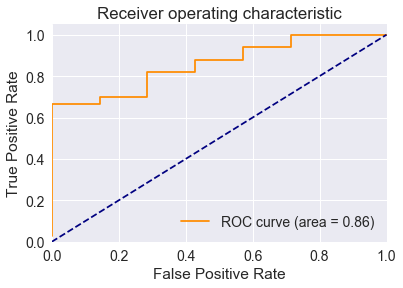

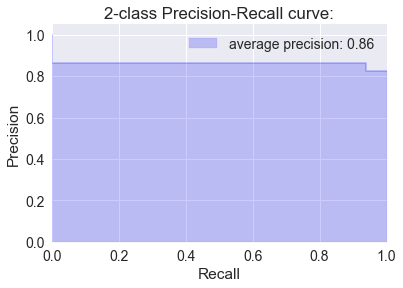

In [0]:
print('Boosted Decision Tree with RFE:')
from sklearn.ensemble import AdaBoostClassifier 
param_grid = {"adaboostclassifier__n_estimators": range(10,100,10), 
              }
pipe_treeBoost = make_imb_pipeline(
                              AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf= 3, min_samples_split= 2,criterion ='entropy', max_depth= 5),random_state=42))

grid_search = GridSearchCV(pipe_treeBoost , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_rfe, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_rfe)
 
y_pred= grid_search.predict_proba(X_test_rfe)

print_results(grid_search.best_estimator_,X_train_rfe,y_train,y_predictions,y_test,y_pred,scoring="f1")

model = grid_search.best_estimator_.steps[0][1]
print (model)
print(model.feature_importances_)

for feat, importance in zip(X.columns, model.feature_importances_):
    print ('feature: {f}, importance: {i}'.format(f=feat, i=importance))

Boosted Decision Tree oneH:
Best recall : 0.9621144984048211
Best parameters:
 {'adaboostclassifier__n_estimators': 30}
             precision    recall  f1-score   support

          0       0.67      0.29      0.40         7
          1       0.86      0.97      0.91        33

avg / total       0.83      0.85      0.82        40


 TN =  2 
 TP =  32 
 FN =  1 
 FP =  5 
 precision = TP/(TP+FP) =  0.8648648648648649 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.85 
 The Missclassification = 1-Accuracy =  0.15000000000000002 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.8648648648648649 
 Negative predictive Value = TN/(TN+FN) =  0.6666666666666666 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.3575757575757577 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.10606060606060597


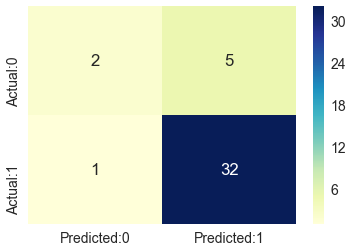

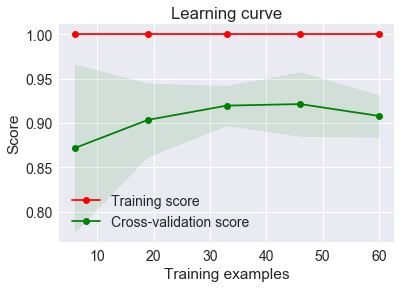

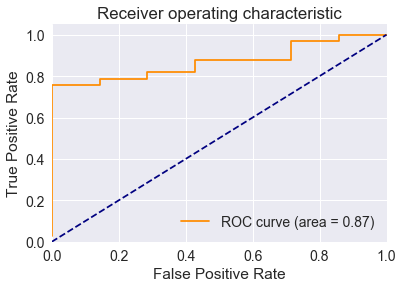

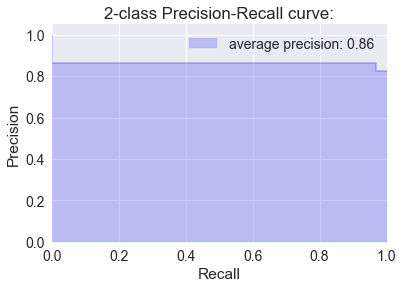

In [0]:
print('Boosted Decision Tree oneH:')
from sklearn.ensemble import AdaBoostClassifier 
param_grid = {"adaboostclassifier__n_estimators": range(10,100,10), 
              }
pipe_treeBoost = make_imb_pipeline(
                              AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf= 3, min_samples_split= 2,criterion ='entropy', max_depth= 5, max_features= 0.9),random_state=42))

grid_search = GridSearchCV(pipe_treeBoost , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_oneH, y_train_oneH)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_oneH)
 
y_pred= grid_search.predict_proba(X_test_oneH)

print_results(grid_search.best_estimator_,X_train_oneH,y_train_oneH,y_predictions,y_test,y_pred,scoring="f1")

Bagged Decision Tree:
Best recall : 0.9498326625935735
Best parameters:
 {'baggingclassifier__n_estimators': 40}
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.86      0.97      0.91        33

   micro avg       0.85      0.85      0.85        40
   macro avg       0.77      0.63      0.66        40
weighted avg       0.83      0.85      0.82        40


 TN =  2 
 TP =  32 
 FN =  1 
 FP =  5 
 precision = TP/(TP+FP) =  0.8648648648648649 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.85 
 The Missclassification = 1-Accuracy =  0.15000000000000002 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.8648648648648649 
 Negative predictive Value = TN/(TN+FN) =  0.6666666666666666 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.3575757575757577 
 Neg

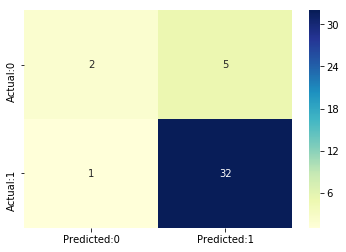

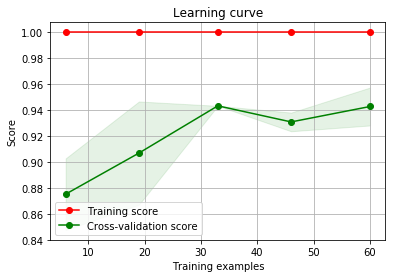

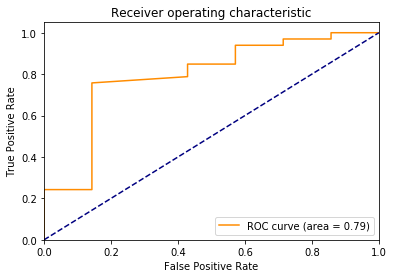

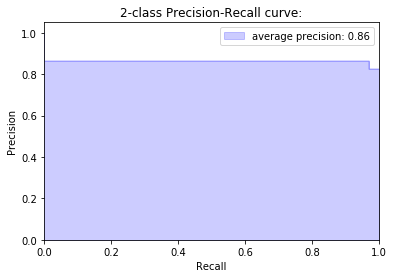

In [0]:
from sklearn.ensemble import BaggingClassifier
print('Bagged Decision Tree:')
param_grid = {
    "baggingclassifier__n_estimators" :  range(10,100,10)
}

pipe_treeBag = make_imb_pipeline(BaggingClassifier(
    DecisionTreeClassifier( criterion ='gini', max_depth= 5, max_features= 0.5, random_state=42),random_state=42))                                                                                                                   

grid_search = GridSearchCV(pipe_treeBag , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)
  

y_pred= grid_search.predict_proba(X_test)

print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1")


Bagged Decision Tree oneH:
Best recall : 0.9430265654648956
Best parameters:
 {'baggingclassifier__n_estimators': 20}
             precision    recall  f1-score   support

          0       0.50      0.14      0.22         7
          1       0.84      0.97      0.90        33

avg / total       0.78      0.82      0.78        40


 TN =  1 
 TP =  32 
 FN =  1 
 FP =  6 
 precision = TP/(TP+FP) =  0.8421052631578947 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.825 
 The Missclassification = 1-Accuracy =  0.17500000000000004 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.14285714285714285 
 Positive Predictive value = TP/(TP+FP) =  0.8421052631578947 
 Negative predictive Value = TN/(TN+FN) =  0.5 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.1313131313131313 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.21212121212121193


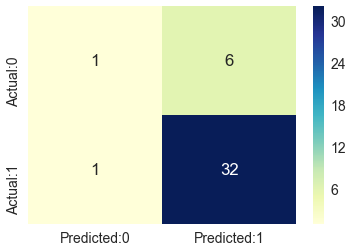

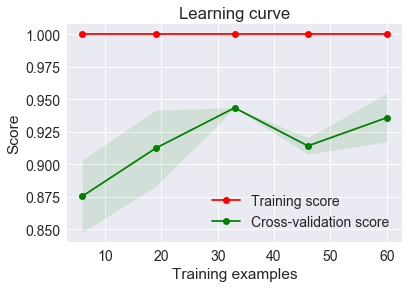

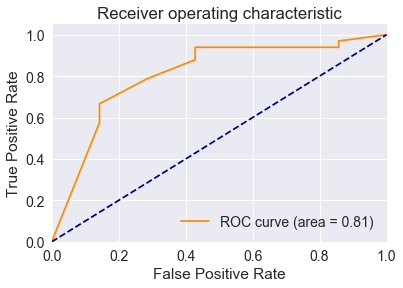

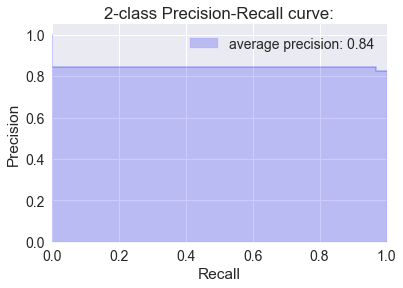

In [0]:
print('Bagged Decision Tree oneH:')
param_grid = {
    "baggingclassifier__n_estimators" :  range(10,100,10)
}

pipe_treeBag = make_imb_pipeline(BaggingClassifier(
    DecisionTreeClassifier( criterion ='gini', max_depth= 5, max_features= 0.5, random_state=42),random_state=42))                                                                                                                   

grid_search = GridSearchCV(pipe_treeBag , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_oneH, y_train_oneH)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_oneH)
  
y_pred= grid_search.predict_proba(X_test_oneH)

print_results(grid_search.best_estimator_,X_train_oneH,y_train_oneH,y_predictions,y_test,y_pred,scoring="f1")

boosted tree with SMOTENC:
Best recall : 0.9222848120718928
Best parameters:
 {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__max_features': 0.4, 'decisiontreeclassifier__min_samples_leaf': 7, 'decisiontreeclassifier__min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.89      0.94      0.91        33

   micro avg       0.85      0.85      0.85        40
   macro avg       0.74      0.68      0.71        40
weighted avg       0.84      0.85      0.84        40


 TN =  3 
 TP =  31 
 FN =  2 
 FP =  4 
 precision = TP/(TP+FP) =  0.8857142857142857 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.85 
 The Missclassification = 1-Accuracy =  0.15000000000000002 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9393939393939394 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.42857142857142855 
 Positive Predicti

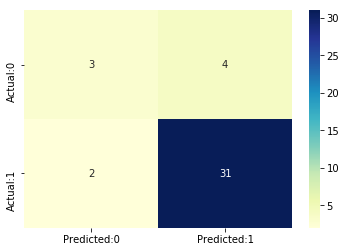

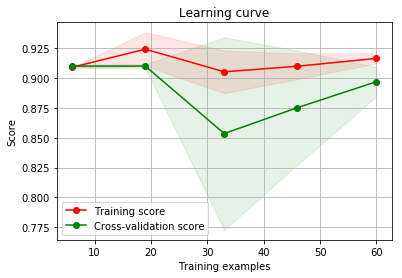

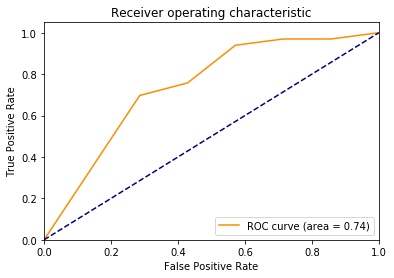

CPU times: user 1h 16min 33s, sys: 1min 5s, total: 1h 17min 38s
Wall time: 1h 45min 10s


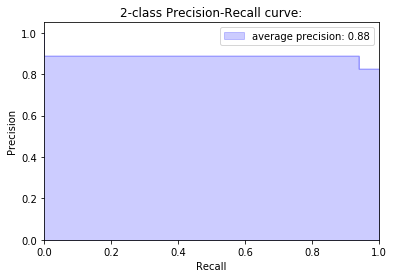

In [0]:
%%time
from sklearn.ensemble import AdaBoostClassifier 
print('boosted tree with SMOTENC:')

param_grid = {'decisiontreeclassifier__max_features': numpy.arange(0.1,1.0,0.1),'decisiontreeclassifier__criterion':['gini', 'entropy'],
              'decisiontreeclassifier__max_depth': numpy.arange(1,20,1), 'decisiontreeclassifier__min_samples_split': range(2, 21),
        'decisiontreeclassifier__min_samples_leaf': range(1, 21)}

pipe_tree = make_imb_pipeline( DecisionTreeClassifier(random_state=42))

grid_search = GridSearchCV(pipe_tree , param_grid, cv=5, scoring='f1')
grid_search.fit(X_resampled, Y_resampled)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_oneH)

y_pred= grid_search.predict_proba(X_test_oneH)

print_results(grid_search.best_estimator_,X_resampled,y_resampled,y_predictions,y_test,y_pred,scoring="f1")

# SVM

SVC:
[1. 1. 1. 1. 1.]
Best recall : 0.9357533271326376
Best parameters:
 {'svc__C': 10, 'svc__gamma': 0.0001, 'svc__kernel': 'poly'}
             precision    recall  f1-score   support

          0       0.67      0.29      0.40         7
          1       0.86      0.97      0.91        33

avg / total       0.83      0.85      0.82        40


 TN =  2 
 TP =  32 
 FN =  1 
 FP =  5 
 precision = TP/(TP+FP) =  0.8648648648648649 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.85 
 The Missclassification = 1-Accuracy =  0.15000000000000002 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.8648648648648649 
 Negative predictive Value = TN/(TN+FN) =  0.6666666666666666 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.3575757575757577 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.10606060606060597


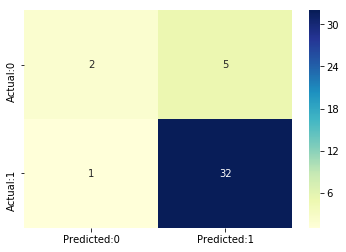

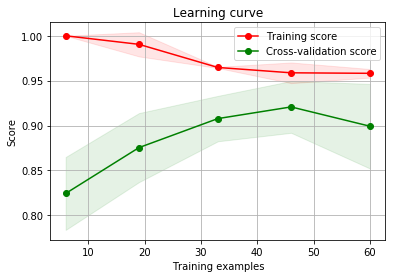

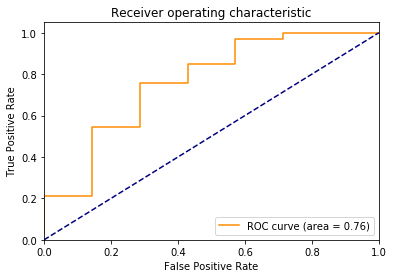

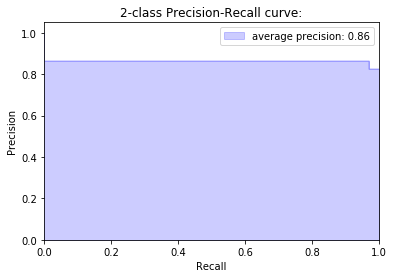

In [0]:
print('SVC:')
from sklearn.svm import SVC
from sklearn.svm import SVC
pipe_svm = make_imb_pipeline(SVC(probability=True) )

grid_search = GridSearchCV(pipe_svm , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)
  

y_pred= grid_search.predict_proba(X_test)
print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1")  

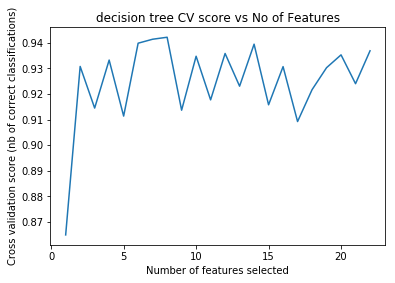

In [0]:
rfecv = RFECV(RandomForestClassifier( random_state=42),scoring='f1')
rfecv.fit(X_train, y_train)

X_train_rfe= rfecv.transform(X_train)
X_test_rfe= rfecv.transform(X_test)

plt.figure()
plt.title('decision tree CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

SVC with rfe:
Best recall : 0.9394084086102996
Best parameters:
 {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.20      0.14      0.17         7
           1       0.83      0.88      0.85        33

   micro avg       0.75      0.75      0.75        40
   macro avg       0.51      0.51      0.51        40
weighted avg       0.72      0.75      0.73        40


 TN =  1 
 TP =  29 
 FN =  4 
 FP =  6 
 precision = TP/(TP+FP) =  0.8285714285714286 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.75 
 The Missclassification = 1-Accuracy =  0.25 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8787878787878788 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.14285714285714285 
 Positive Predictive value = TP/(TP+FP) =  0.8285714285714286 
 Negative predictive Value = TN/(TN+FN) =  0.2 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.025252525252525 
 Negative likelihood Ratio

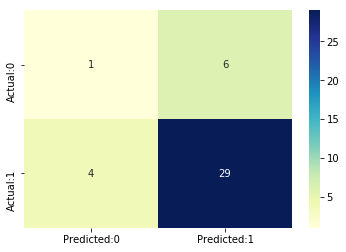

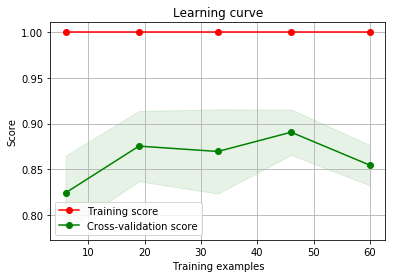

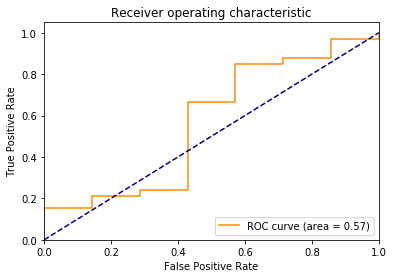

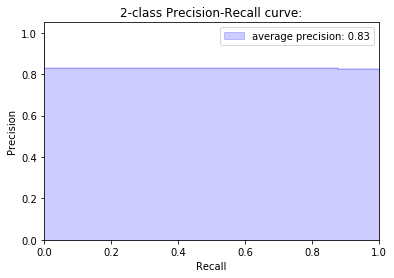

In [0]:
print('SVC with rfe:')

from sklearn.svm import SVC
param_grid = {"svc__kernel" : ['linear', 'poly', 'rbf', 'sigmoid'], 
              "svc__gamma" :  [1e-1, 1e-2, 1e-3, 1e-4],
             "svc__C":[1, 10, 100, 1000]}


pipe_svm = make_imb_pipeline(SVC(probability=True) )

grid_search = GridSearchCV(pipe_svm , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_rfe, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_rfe)
y_pred= grid_search.predict_proba(X_test_rfe)

print_results(grid_search.best_estimator_,X_train_rfe,y_train,y_predictions,y_test,y_pred,scoring="f1")

SVC boosted:
Best recall : 0.8918495912954041
Best parameters:
 {'adaboostclassifier__n_estimators': 10}
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.89      0.94      0.91        33

   micro avg       0.85      0.85      0.85        40
   macro avg       0.74      0.68      0.71        40
weighted avg       0.84      0.85      0.84        40


 TN =  3 
 TP =  31 
 FN =  2 
 FP =  4 
 precision = TP/(TP+FP) =  0.8857142857142857 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.85 
 The Missclassification = 1-Accuracy =  0.15000000000000002 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9393939393939394 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.42857142857142855 
 Positive Predictive value = TP/(TP+FP) =  0.8857142857142857 
 Negative predictive Value = TN/(TN+FN) =  0.6 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.643939393939394 
 Negative likelihood Ratio 

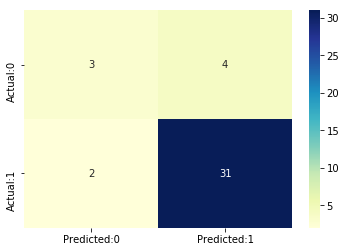

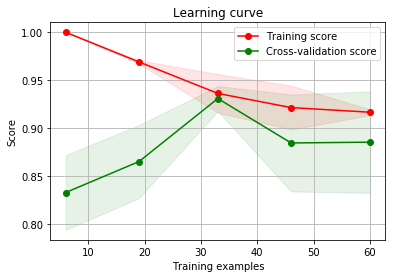

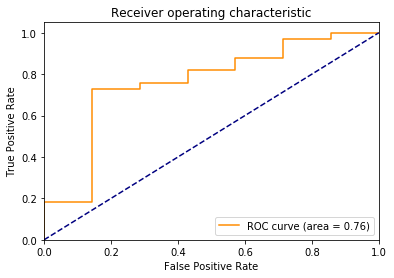

CPU times: user 2.75 s, sys: 114 ms, total: 2.86 s
Wall time: 3.25 s


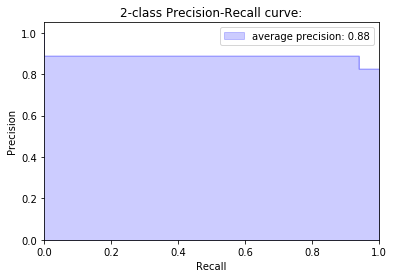

In [0]:
%%time
from sklearn.ensemble import AdaBoostClassifier 
print('SVC boosted:')
from sklearn.svm import SVC
param_grid = {"adaboostclassifier__n_estimators" : range(10,100,10), 
              }

pipe_svm = make_imb_pipeline(AdaBoostClassifier(SVC(probability=True,C= 10, gamma = 0.0001, kernel = 'poly'),algorithm='SAMME') )

grid_search = GridSearchCV(pipe_svm , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)
  
y_pred= grid_search.predict_proba(X_test)
print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1")

SVC boosted oneH:
Best recall : 0.8704275609448023
Best parameters:
 {'adaboostclassifier__n_estimators': 10}
             precision    recall  f1-score   support

          0       0.67      0.29      0.40         7
          1       0.86      0.97      0.91        33

avg / total       0.83      0.85      0.82        40


 TN =  2 
 TP =  32 
 FN =  1 
 FP =  5 
 precision = TP/(TP+FP) =  0.8648648648648649 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.85 
 The Missclassification = 1-Accuracy =  0.15000000000000002 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.8648648648648649 
 Negative predictive Value = TN/(TN+FN) =  0.6666666666666666 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.3575757575757577 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.10606060606060597


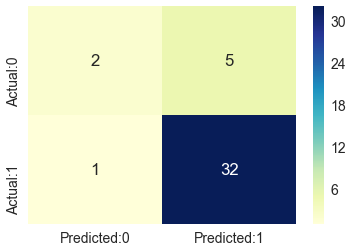

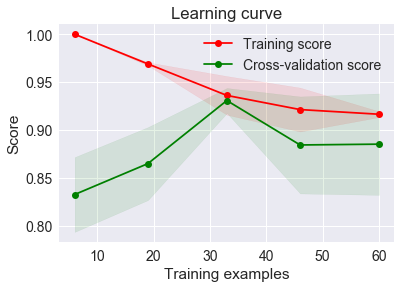

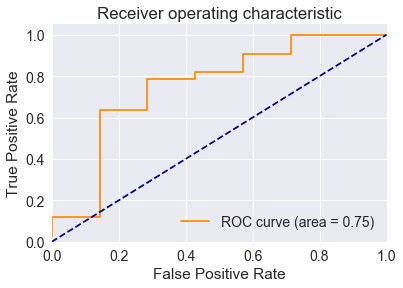

CPU times: user 3.52 s, sys: 44.1 ms, total: 3.57 s
Wall time: 3.63 s


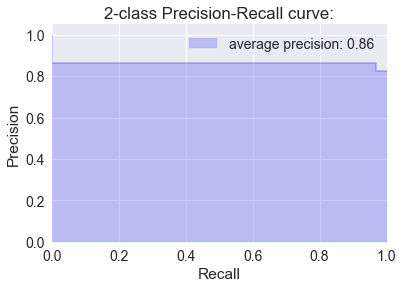

In [0]:
%%time
print('SVC boosted oneH:')
from sklearn.svm import SVC
param_grid = {"adaboostclassifier__n_estimators" : range(10,100,10), 
              }

pipe_svm = make_imb_pipeline(AdaBoostClassifier(SVC(probability=True,C= 10, gamma = 0.0001, kernel = 'poly'),algorithm='SAMME') )

grid_search = GridSearchCV(pipe_svm , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_oneH, y_train_oneH)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_oneH)
  

y_pred= grid_search.predict_proba(X_test_oneH)
print_results(grid_search.best_estimator_,X_train_oneH,y_train_oneH,y_predictions,y_test,y_pred,scoring="f1")

SVC bagged:
Best recall : 0.9357533271326376
Best parameters:
 {'baggingclassifier__n_estimators': 30}
             precision    recall  f1-score   support

          0       0.67      0.29      0.40         7
          1       0.86      0.97      0.91        33

avg / total       0.83      0.85      0.82        40


 TN =  2 
 TP =  32 
 FN =  1 
 FP =  5 
 precision = TP/(TP+FP) =  0.8648648648648649 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.85 
 The Missclassification = 1-Accuracy =  0.15000000000000002 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.8648648648648649 
 Negative predictive Value = TN/(TN+FN) =  0.6666666666666666 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.3575757575757577 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.10606060606060597


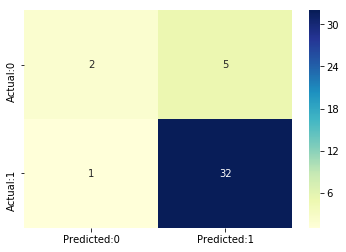

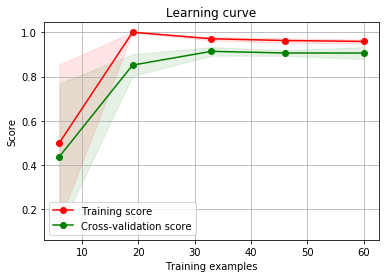

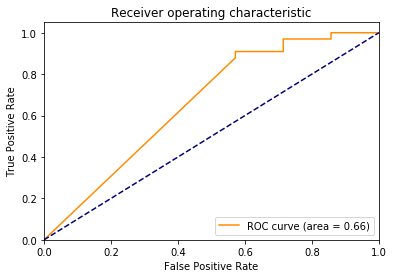

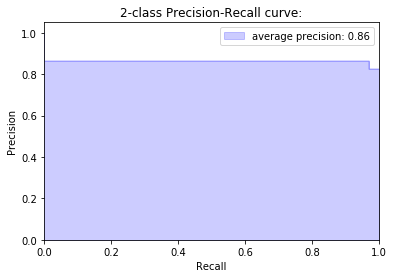

In [0]:

print('SVC bagged:')
from sklearn.svm import SVC
param_grid = {
    "baggingclassifier__n_estimators" :  range(10,100,10)
}

pipe_svm = make_imb_pipeline(BaggingClassifier(SVC(C= 10, gamma = 0.0001, kernel = 'poly')) )

grid_search = GridSearchCV(pipe_svm , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)
  
y_pred= grid_search.predict_proba(X_test)
print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1") 

SVC SMOTENC:
Best recall : 0.9255250194451646
Best parameters:
 {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.20      0.14      0.17         7
           1       0.83      0.88      0.85        33

   micro avg       0.75      0.75      0.75        40
   macro avg       0.51      0.51      0.51        40
weighted avg       0.72      0.75      0.73        40


 TN =  1 
 TP =  29 
 FN =  4 
 FP =  6 
 precision = TP/(TP+FP) =  0.8285714285714286 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.75 
 The Missclassification = 1-Accuracy =  0.25 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8787878787878788 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.14285714285714285 
 Positive Predictive value = TP/(TP+FP) =  0.8285714285714286 
 Negative predictive Value = TN/(TN+FN) =  0.2 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.025252525252525 
 Negative likelihood Ratio

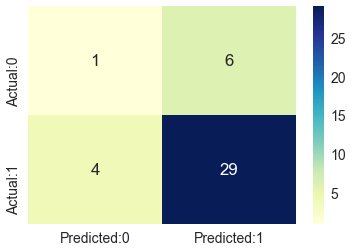

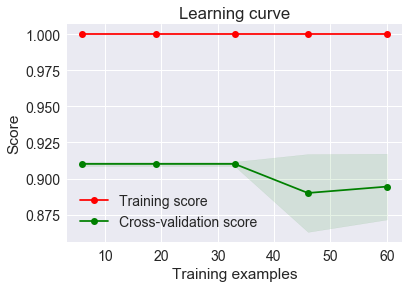

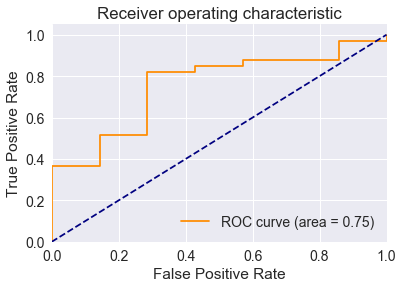

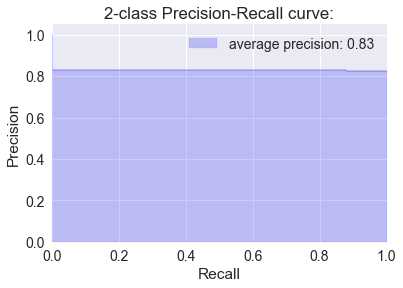

In [0]:
from sklearn.svm import SVC
print('SVC SMOTENC:')

param_grid = {"svc__kernel" : ['linear', 'poly', 'rbf', 'sigmoid'], 
              "svc__gamma" :  [1e-1, 1e-2, 1e-3, 1e-4],
             "svc__C":[1, 10, 100, 1000]}



pipe_svm = make_imb_pipeline(SVC(probability=True) )


grid_search = GridSearchCV(pipe_svm , param_grid, cv=5, scoring='f1')
grid_search.fit(X_resampled, Y_resampled)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_oneH)

y_pred= grid_search.predict_proba(X_test_oneH)

print_results(grid_search.best_estimator_,X_resampled,Y_resampled,y_predictions,y_test,y_pred,scoring="f1")

# Random forrest

Random forest:
[0.875 1.    0.875 1.    0.875 0.75  1.    1.    1.    1.   ]
Best recall : 0.9625940947098443
Best parameters:
 {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__n_estimators': 20}
             precision    recall  f1-score   support

          0       0.67      0.29      0.40         7
          1       0.86      0.97      0.91        33

avg / total       0.83      0.85      0.82        40


 TN =  2 
 TP =  32 
 FN =  1 
 FP =  5 
 precision = TP/(TP+FP) =  0.8648648648648649 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.85 
 The Missclassification = 1-Accuracy =  0.15000000000000002 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.8648648648648649 
 Negative predictive Value = TN/(TN+FN) =  0.6666666666666666 
 Positive Likelihood Ratio = Sensitivity/(1-Spec

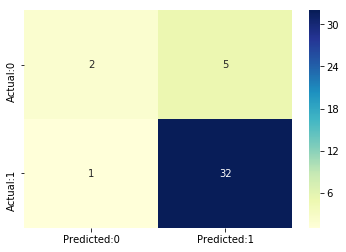

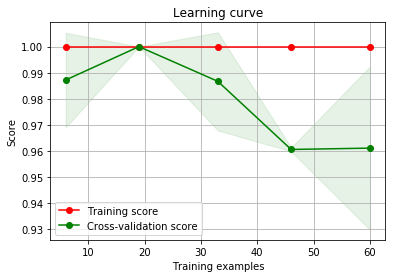

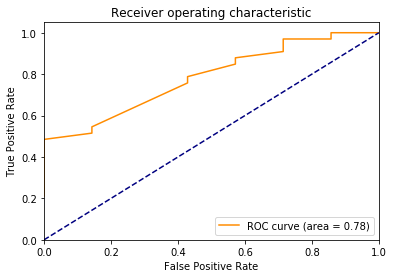

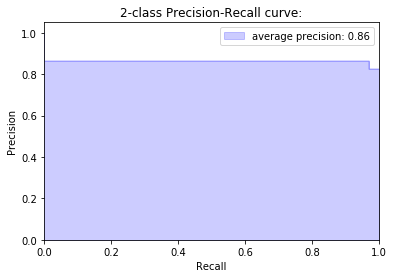

In [0]:
%%time
print('Random forest:')
param_grid = { "randomforestclassifier__n_estimators": range(10,100,10),
           "randomforestclassifier__criterion"          : ["gini", "entropy"],
           "randomforestclassifier__max_depth"          : range(1,15,1),
           }

pipe_rf = make_imb_pipeline(RandomForestClassifier(random_state=42 ))


grid_search = GridSearchCV(pipe_rf , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)
  
y_pred= grid_search.predict_proba(X_test)
print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1") 

Random forest:
Best recall : 0.9625940947098443
Best parameters:
 {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 20}
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.86      0.97      0.91        33

   micro avg       0.85      0.85      0.85        40
   macro avg       0.77      0.63      0.66        40
weighted avg       0.83      0.85      0.82        40


 TN =  2 
 TP =  32 
 FN =  1 
 FP =  5 
 precision = TP/(TP+FP) =  0.8648648648648649 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.85 
 The Missclassification = 1-Accuracy =  0.15000000000000002 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = 

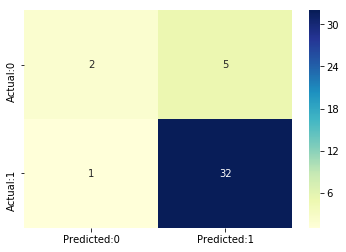

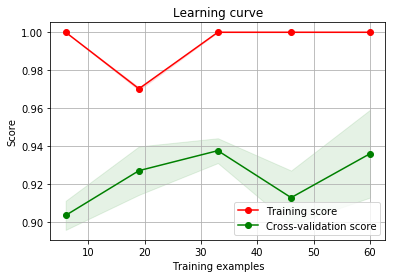

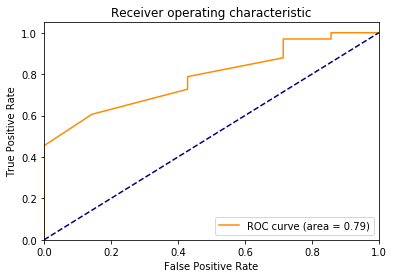

CPU times: user 10h 55min 34s, sys: 11min 14s, total: 11h 6min 48s
Wall time: 21h 13s


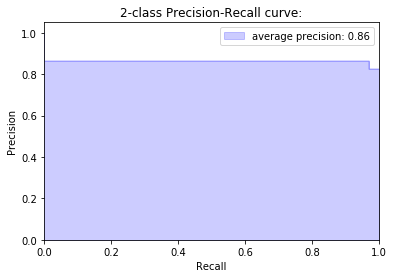

In [0]:
%%time
print('Random forest:')
param_grid = { "randomforestclassifier__n_estimators": range(10,100,10),
           "randomforestclassifier__criterion"          : ["gini", "entropy"],
       
              'randomforestclassifier__max_depth': numpy.arange(1,20,1), 'randomforestclassifier__min_samples_split': range(2, 21),
        'randomforestclassifier__min_samples_leaf': range(1, 21)
           }

pipe_rf = make_imb_pipeline(RandomForestClassifier(random_state=42 ))

grid_search = GridSearchCV(pipe_rf , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)
  
y_pred= grid_search.predict_proba(X_test)
print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1") 

Random forest smoteNC:
Best recall : 0.9265166310469466
Best parameters:
 {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 1, 'randomforestclassifier__n_estimators': 20}
              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.84      0.97      0.90        33

   micro avg       0.82      0.82      0.82        40
   macro avg       0.67      0.56      0.56        40
weighted avg       0.78      0.82      0.78        40


 TN =  1 
 TP =  32 
 FN =  1 
 FP =  6 
 precision = TP/(TP+FP) =  0.8421052631578947 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.825 
 The Missclassification = 1-Accuracy =  0.17500000000000004 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.14285714285714285 
 Positive Predictive value = TP/(TP+FP) =  0.8421052631578947 
 Negative predictive Value = TN/(TN+FN) =  0.5 
 Posit

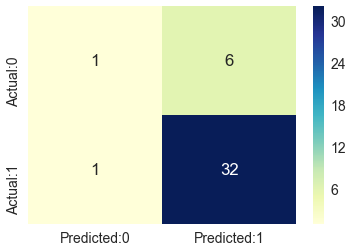

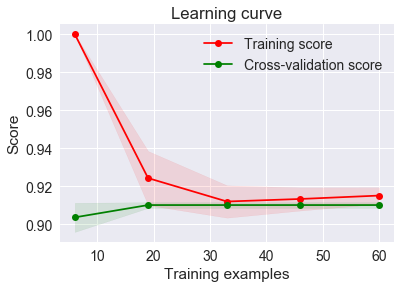

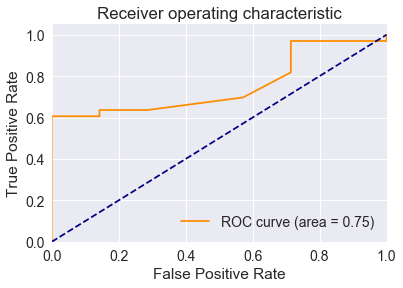

CPU times: user 1min 16s, sys: 642 ms, total: 1min 17s
Wall time: 1min 19s


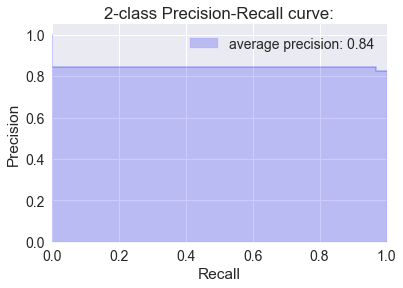

In [0]:
%%time
print('Random forest smoteNC:')
from sklearn.ensemble import RandomForestClassifier 


param_grid = { "randomforestclassifier__n_estimators": range(10,100,10),
           "randomforestclassifier__criterion"          : ["gini", "entropy"],
           "randomforestclassifier__max_depth"          : range(1,15,1),
           }

pipe_rf = make_imb_pipeline(RandomForestClassifier(random_state=42 ))

grid_search = GridSearchCV(pipe_rf , param_grid, cv=5, scoring='f1')
grid_search.fit(X_resampled, Y_resampled)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_oneH)

y_pred= grid_search.predict_proba(X_test_oneH)

print_results(grid_search.best_estimator_,X_resampled,Y_resampled,y_predictions,y_test,y_pred,scoring="f1")

Random forest oneH:
Best recall : 0.9326482341188223
Best parameters:
 {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 3, 'randomforestclassifier__n_estimators': 70}
              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.85      1.00      0.92        33

   micro avg       0.85      0.85      0.85        40
   macro avg       0.92      0.57      0.58        40
weighted avg       0.87      0.85      0.80        40


 TN =  1 
 TP =  33 
 FN =  0 
 FP =  6 
 precision = TP/(TP+FP) =  0.8461538461538461 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.85 
 The Missclassification = 1-Accuracy =  0.15000000000000002 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  1.0 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.14285714285714285 
 Positive Predictive value = TP/(TP+FP) =  0.8461538461538461 
 Negative predictive Value = TN/(TN+FN) =  1.0 
 Positive Likelihood Rati

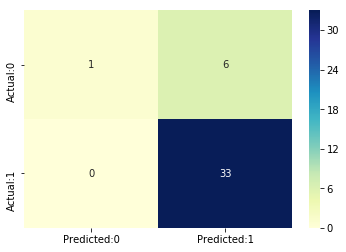

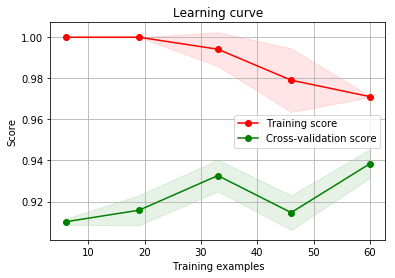

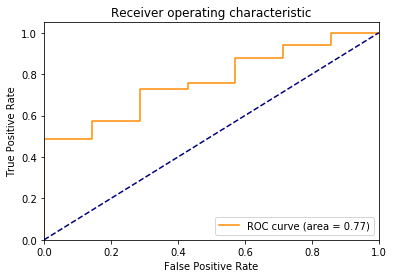

CPU times: user 1min 21s, sys: 1.66 s, total: 1min 23s
Wall time: 1min 35s


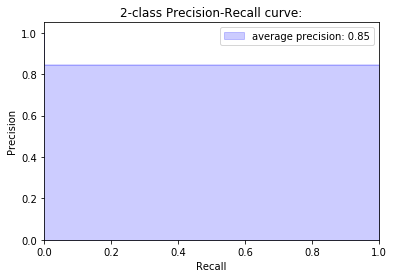

In [0]:
%%time
print('Random forest oneH:')
param_grid = { "randomforestclassifier__n_estimators": range(10,100,10),
           "randomforestclassifier__criterion"          : ["gini", "entropy"],
           "randomforestclassifier__max_depth"          : range(1,15,1),
           }

pipe_rf = make_imb_pipeline(RandomForestClassifier(random_state=42 ))

grid_search = GridSearchCV(pipe_rf , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_oneH, y_train_oneH)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_oneH)

y_pred= grid_search.predict_proba(X_test_oneH)
print_results(grid_search.best_estimator_,X_train_oneH,y_train_oneH,y_predictions,y_test,y_pred,scoring="f1") 

Random forest with feature selection:
Best recall : 0.9745308454985875
Best parameters:
 {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.7000000000000001, 'randomforestclassifier__n_estimators': 60}
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.86      0.97      0.91        33

   micro avg       0.85      0.85      0.85        40
   macro avg       0.77      0.63      0.66        40
weighted avg       0.83      0.85      0.82        40


 TN =  2 
 TP =  32 
 FN =  1 
 FP =  5 
 precision = TP/(TP+FP) =  0.8648648648648649 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.85 
 The Missclassification = 1-Accuracy =  0.15000000000000002 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =

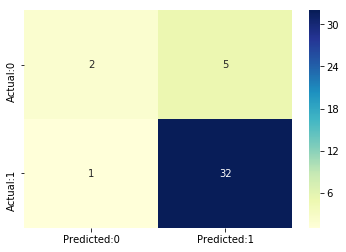

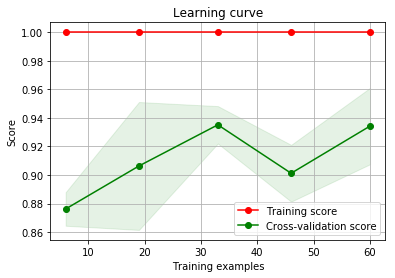

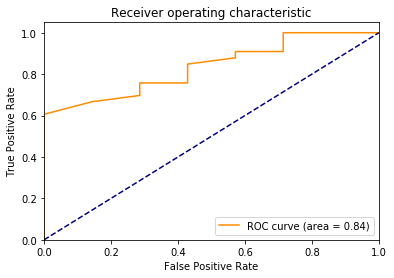

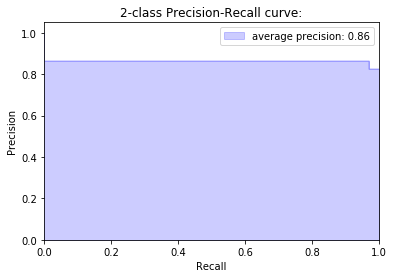

In [0]:
print('Random forest with feature selection:')

param_grid = { "randomforestclassifier__n_estimators": range(10,100,10),
           "randomforestclassifier__criterion"          : ["gini", "entropy"],
           "randomforestclassifier__max_depth"          : range(1,15,1),
           "randomforestclassifier__max_features":  numpy.arange(0.1,1.0,0.1),
             }

pipe_rf = make_imb_pipeline(RandomForestClassifier(random_state=42 ))

grid_search = GridSearchCV(pipe_rf , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)

y_pred= grid_search.predict_proba(X_test)
print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1") 

# Extra tree

Extra Tree:
Best recall : 0.9498060762766646
Best parameters:
 {'extratreeclassifier__criterion': 'gini', 'extratreeclassifier__max_depth': 2, 'extratreeclassifier__max_features': 0.30000000000000004, 'extratreeclassifier__min_samples_leaf': 1, 'extratreeclassifier__min_samples_split': 2}
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         7
          1       0.82      0.97      0.89        33

avg / total       0.68      0.80      0.73        40


 TN =  0 
 TP =  32 
 FN =  1 
 FP =  7 
 precision = TP/(TP+FP) =  0.8205128205128205 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8 
 The Missclassification = 1-Accuracy =  0.19999999999999996 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.0 
 Positive Predictive value = TP/(TP+FP) =  0.8205128205128205 
 Negative predictive Value = TN/(TN+FN) =  0.0 
 Positive Likelihood Ratio = Sensitivity/(1-Specif

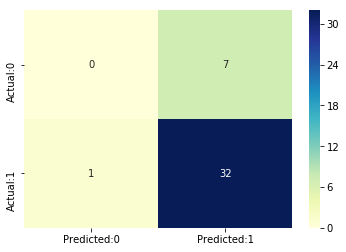

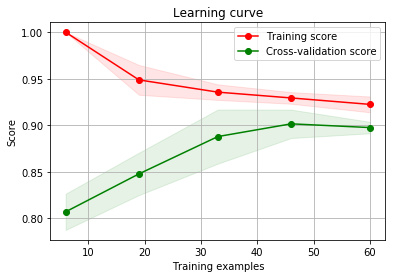

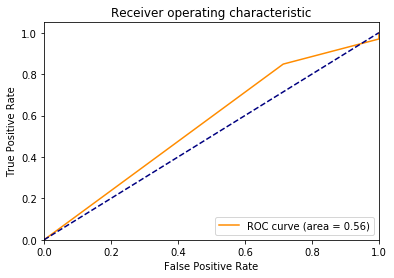

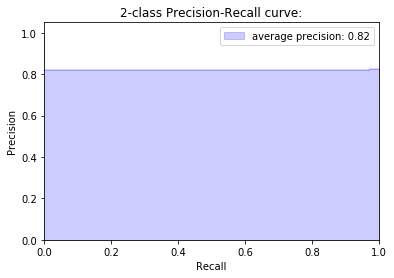

In [0]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import recall_score
print('Extra Tree:')

param_grid  = {'extratreeclassifier__criterion': ['gini', 'entropy'],
              'extratreeclassifier__max_depth':range(1,15,1),
              'extratreeclassifier__min_samples_split': range(2, 21),
        'extratreeclassifier__min_samples_leaf': range(1, 21),
               "extratreeclassifier__max_features":  numpy.arange(0.1,1.0,0.1)}


pipe_Etree = make_imb_pipeline(ExtraTreeClassifier(random_state=42 ))

grid_search = GridSearchCV(pipe_Etree , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_oneH, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_oneH)
  
y_pred= grid_search.predict_proba(X_test_oneH)
print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1") 

Extra Tree smoteNC:
Best recall : 0.8900863659850891
Best parameters:
 {'extratreeclassifier__criterion': 'gini', 'extratreeclassifier__max_depth': 6, 'extratreeclassifier__max_features': 0.6, 'extratreeclassifier__min_samples_leaf': 3, 'extratreeclassifier__min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.20      0.14      0.17         7
           1       0.83      0.88      0.85        33

   micro avg       0.75      0.75      0.75        40
   macro avg       0.51      0.51      0.51        40
weighted avg       0.72      0.75      0.73        40


 TN =  1 
 TP =  29 
 FN =  4 
 FP =  6 
 precision = TP/(TP+FP) =  0.8285714285714286 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.75 
 The Missclassification = 1-Accuracy =  0.25 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8787878787878788 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.14285714285714285 
 Positive Predictive value = TP/(TP+FP) =  0.8285714285

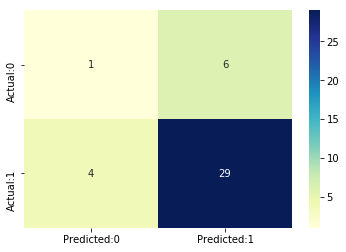

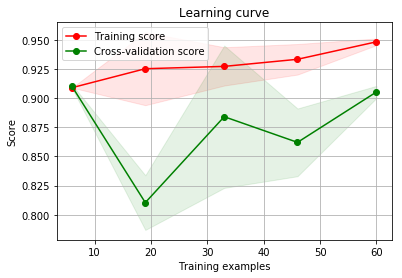

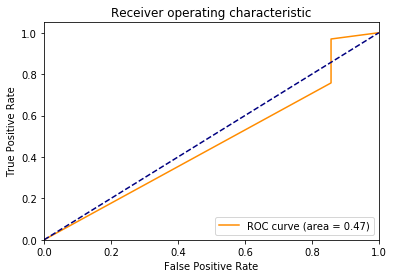

CPU times: user 54min 48s, sys: 51.5 s, total: 55min 40s
Wall time: 59min 36s


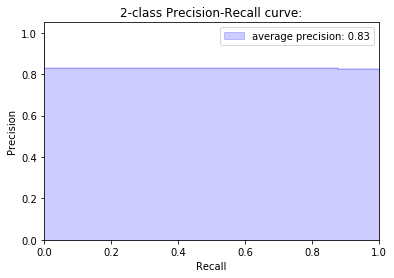

In [0]:
%%time
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import recall_score
print('Extra Tree smoteNC:')

param_grid  = {'extratreeclassifier__criterion': ['gini', 'entropy'],
              'extratreeclassifier__max_depth':range(1,15,1),
              'extratreeclassifier__min_samples_split': range(2, 21),
        'extratreeclassifier__min_samples_leaf': range(1, 21),
               "extratreeclassifier__max_features":  numpy.arange(0.1,1.0,0.1)}

pipe_Etree = make_imb_pipeline(ExtraTreeClassifier(random_state=42 ))

grid_search = GridSearchCV(pipe_Etree , param_grid, cv=5, scoring='f1')
grid_search.fit(X_resampled, Y_resampled)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_oneH)

y_pred= grid_search.predict_proba(X_test_oneH)

print_results(grid_search.best_estimator_,X_resampled,y_resampled,y_predictions,y_test,y_pred,scoring="f1")

# KNN

KNN:
[1.         1.         0.875      1.         0.875      0.875
 1.         1.         0.85714286 1.        ]
Best recall : 0.9430265654648956
Best parameters:
 {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'uniform'}
             precision    recall  f1-score   support

          0       0.33      0.14      0.20         7
          1       0.84      0.94      0.89        33

avg / total       0.75      0.80      0.77        40


 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8 
 The Missclassification = 1-Accuracy =  0.19999999999999996 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9393939393939394 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.14285714285714285 
 Positive Predictive value = TP/(TP+FP) =  0.8378378378378378 
 Negative predictive Value = TN/(TN+FN) =  0.3333333333333333 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.095959595959596 
 Negative likelihood Rat

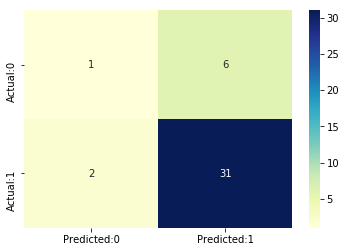

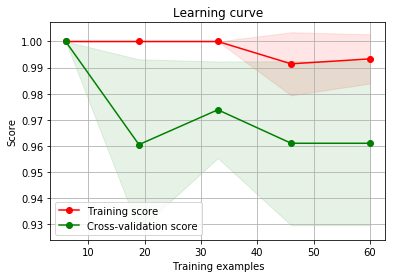

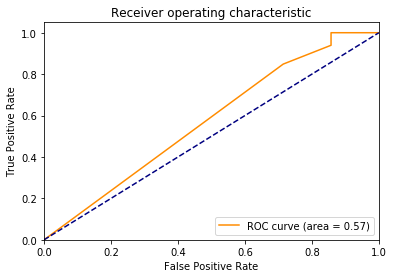

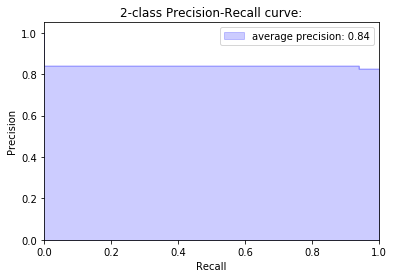

In [0]:
print('KNN:')
param_grid = {
        "kneighborsclassifier__n_neighbors": range(1, 30), 
        "kneighborsclassifier__weights" : ["uniform", "distance"],
        "kneighborsclassifier__metric": ["hamming", "euclidean", "manhattan", "chebyshev", "minkowski", "jaccard", "dice", "canberra", "braycurtis"]
}

pipe_KNN = make_imb_pipeline(KNeighborsClassifier())

grid_search = GridSearchCV(pipe_KNN , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)
  
y_pred= grid_search.predict_proba(X_test)
print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1") 

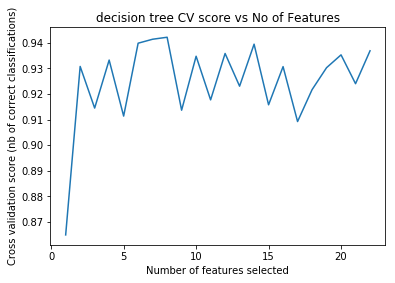

In [0]:
rfecv = RFECV(RandomForestClassifier( random_state=42),scoring='f1')
rfecv.fit(X_train, y_train)

X_train_rfe= rfecv.transform(X_train)
X_test_rfe= rfecv.transform(X_test)

plt.figure()
plt.title('decision tree CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

KNN met RFE:
Best recall : 0.9437927280093178
Best parameters:
 {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.86      0.94      0.90        33

   micro avg       0.82      0.82      0.82        40
   macro avg       0.68      0.61      0.63        40
weighted avg       0.80      0.82      0.80        40


 TN =  2 
 TP =  31 
 FN =  2 
 FP =  5 
 precision = TP/(TP+FP) =  0.8611111111111112 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.825 
 The Missclassification = 1-Accuracy =  0.17500000000000004 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9393939393939394 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.8611111111111112 
 Negative predictive Value = TN/(TN+FN) =  0.5 
 Positive Likelih

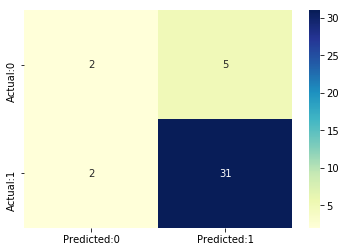

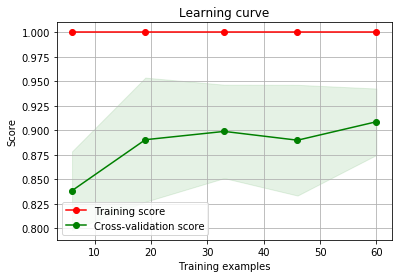

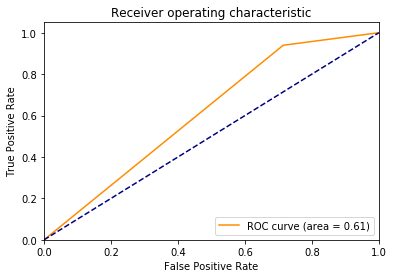

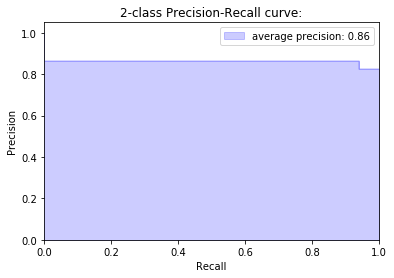

In [0]:
print('KNN met RFE:')
param_grid = {
        "kneighborsclassifier__n_neighbors": range(1, 30), 
        "kneighborsclassifier__weights" : ["uniform", "distance"],
        "kneighborsclassifier__metric": ["hamming", "euclidean", "manhattan", "chebyshev", "minkowski", "jaccard", "dice", "canberra", "braycurtis"]
}

pipe_KNN = make_imb_pipeline(KNeighborsClassifier())

grid_search = GridSearchCV(pipe_KNN , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_rfe, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_rfe)

y_pred= grid_search.predict_proba(X_test_rfe)
print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1") 

# LDA

LDA:
[0.875      1.         1.         1.         0.875      0.875
 1.         1.         0.71428571 1.        ]
Best recall : 0.9342032967032966
Best parameters:
 {'lineardiscriminantanalysis__n_components': 0}
             precision    recall  f1-score   support

          0       0.50      0.29      0.36         7
          1       0.86      0.94      0.90        33

avg / total       0.80      0.82      0.80        40


 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.825 
 The Missclassification = 1-Accuracy =  0.17500000000000004 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9393939393939394 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.8611111111111112 
 Negative predictive Value = TN/(TN+FN) =  0.5 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.3151515151515152 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.21212121212121193


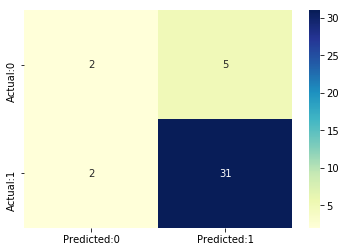

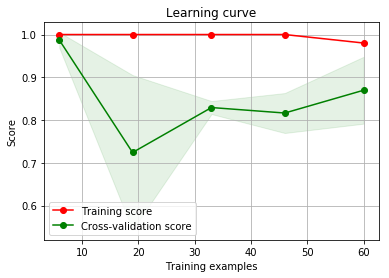

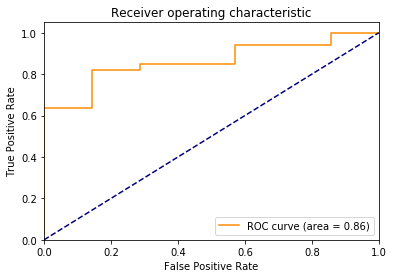

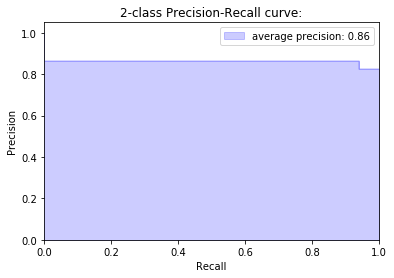

In [0]:
print('LDA:')
from scipy.stats import uniform
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
param_grid = {
        
    "lineardiscriminantanalysis__n_components" : range(0,4),
}

pipe_LDA = make_imb_pipeline(LinearDiscriminantAnalysis())

grid_search = GridSearchCV(pipe_LDA , param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)
  
y_pred= grid_search.predict_proba(X_test)
print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="recall") 

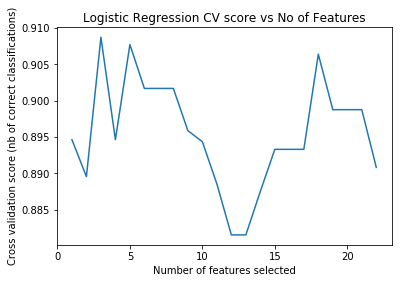

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
rfecv = RFECV(LinearDiscriminantAnalysis(), scoring="f1")
rfecv.fit(X_train, y_train)

X_train_rfe= rfecv.transform(X_train)
X_test_rfe= rfecv.transform(X_test)

plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

LDA with RFE:
Best recall : 0.9096153846153847
Best parameters:
 {'lineardiscriminantanalysis__n_components': 0}
              precision    recall  f1-score   support

           0       0.22      0.29      0.25         7
           1       0.84      0.79      0.81        33

   micro avg       0.70      0.70      0.70        40
   macro avg       0.53      0.54      0.53        40
weighted avg       0.73      0.70      0.71        40


 TN =  2 
 TP =  26 
 FN =  7 
 FP =  5 
 precision = TP/(TP+FP) =  0.8387096774193549 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.7 
 The Missclassification = 1-Accuracy =  0.30000000000000004 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.7878787878787878 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.8387096774193549 
 Negative predictive Value = TN/(TN+FN) =  0.2222222222222222 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.103030303030303 
 Negat

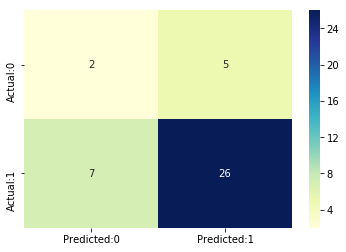

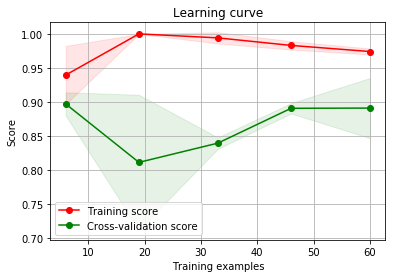

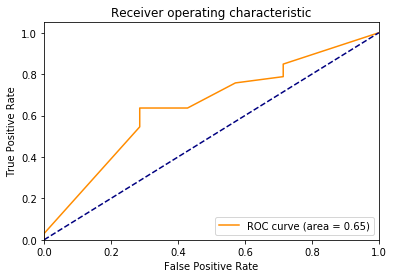

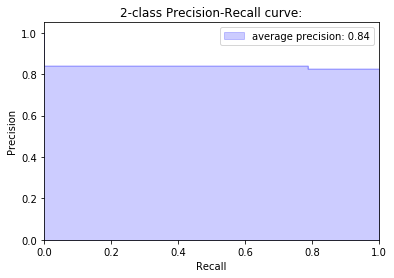

In [0]:
print('LDA with RFE:')
from scipy.stats import uniform
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
param_grid = {
        
    "lineardiscriminantanalysis__n_components" : range(0,4),

}

pipe_LDA = make_imb_pipeline(LinearDiscriminantAnalysis())

grid_search = GridSearchCV(pipe_LDA , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_rfe, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_rfe)

y_pred= grid_search.predict_proba(X_test_rfe)
print_results(grid_search.best_estimator_,X_train_rfe,y_train,y_predictions,y_test,y_pred,scoring="f1") 

LDA smotenc:
Best recall : 0.9210526315789473
Best parameters:
 {'lineardiscriminantanalysis__n_components': 0}
              precision    recall  f1-score   support

           0       0.33      0.14      0.20         7
           1       0.84      0.94      0.89        33

   micro avg       0.80      0.80      0.80        40
   macro avg       0.59      0.54      0.54        40
weighted avg       0.75      0.80      0.77        40


 TN =  1 
 TP =  31 
 FN =  2 
 FP =  6 
 precision = TP/(TP+FP) =  0.8378378378378378 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8 
 The Missclassification = 1-Accuracy =  0.19999999999999996 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9393939393939394 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.14285714285714285 
 Positive Predictive value = TP/(TP+FP) =  0.8378378378378378 
 Negative predictive Value = TN/(TN+FN) =  0.3333333333333333 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.095959595959596 
 Negat

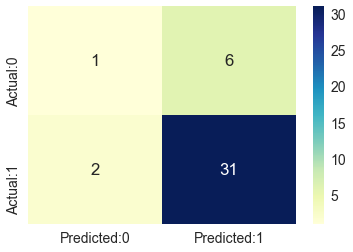

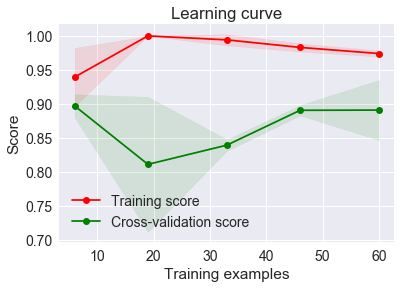

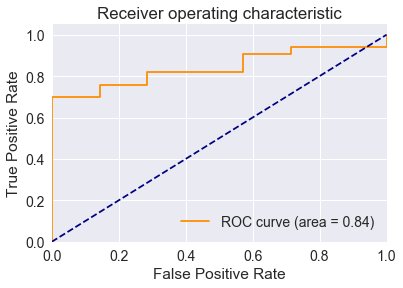

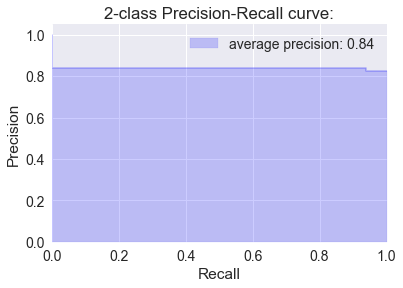

In [0]:
print('LDA smotenc:')
from scipy.stats import uniform
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
param_grid = {
    
    "lineardiscriminantanalysis__n_components" : range(0,4),
}

pipe_LDA = make_imb_pipeline(LinearDiscriminantAnalysis())

grid_search = GridSearchCV(pipe_LDA , param_grid, cv=5, scoring='recall')
grid_search.fit(X_resampled, Y_resampled)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_oneH)

y_pred= grid_search.predict_proba(X_test_oneH)

print_results(grid_search.best_estimator_,X_resampled,Y_resampled,y_predictions,y_test,y_pred,scoring="f1")

# Voting

In [0]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

pipe_svc = make_imb_pipeline(BaggingClassifier(SVC(C= 10, gamma = 0.0001, kernel = 'poly')) )
pipe_treeBoost = make_imb_pipeline(
                              AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf= 3, min_samples_split= 2,criterion ='entropy', max_depth= 5),random_state=42))

pipe_lr = make_imb_pipeline(PolynomialFeatures(interaction_only=True),LogisticRegression(random_state=42, C= 0.001 ))
pipe_treeExtra = make_imb_pipeline(ExtraTreeClassifier(criterion ='entropy', max_depth= 5, max_leaf_nodes =50 ))
pipe_LD = make_imb_pipeline(LinearDiscriminantAnalysis(n_components=0))
pipe_KNN = make_imb_pipeline(KNeighborsClassifier(metric= 'manhattan', n_neighbors = 3, 
                                                  weights ='uniform'))
pipe_tree_RF = make_imb_pipeline(RandomForestClassifier(random_state=42, criterion= 'entropy',max_depth = 8 ,min_samples_leaf= 1,min_samples_split =2 ,n_estimators = 20))
 
best_estimators = [('lr', pipe_lr),('nb', pipe_nb),('svc', pipe_svc), ('treeboost', pipe_treeBoost),('treeRF', pipe_tree_RF), ('LD', pipe_LD)]

In [0]:
from sklearn.ensemble import VotingClassifier
vc_hard = VotingClassifier(estimators=best_estimators, voting='hard', n_jobs=4)

vc_soft = VotingClassifier(estimators=best_estimators, voting='soft', n_jobs=4)

Best recall : 0.9416321773464631
Best parameters:
 {}
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.86      0.97      0.91        33

   micro avg       0.85      0.85      0.85        40
   macro avg       0.77      0.63      0.66        40
weighted avg       0.83      0.85      0.82        40


 TN =  2 
 TP =  32 
 FN =  1 
 FP =  5 
 precision = TP/(TP+FP) =  0.8648648648648649 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.85 
 The Missclassification = 1-Accuracy =  0.15000000000000002 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9696969696969697 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.8648648648648649 
 Negative predictive Value = TN/(TN+FN) =  0.6666666666666666 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.3575757575757577 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.1

/Users/simon/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/simon/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/simon/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/simon/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/simon/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/simon/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("V

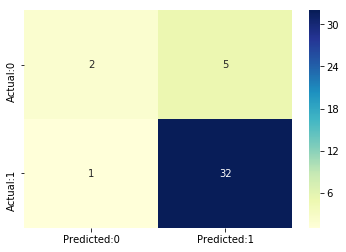

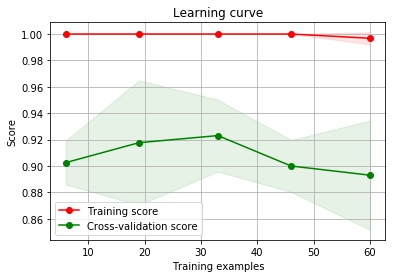

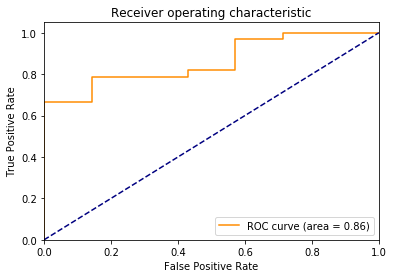

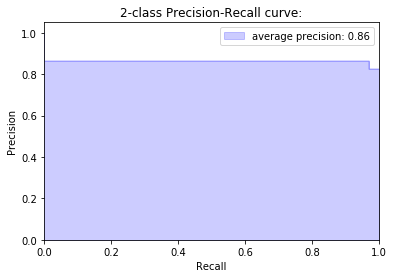

In [0]:
param_grid = {
}

grid_search = GridSearchCV(vc_soft  , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)

y_pred= grid_search.predict_proba(X_test)
print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1")

Best recall : 0.9238872362342885
Best parameters:
 {}
              precision    recall  f1-score   support

           0       0.33      0.14      0.20         7
           1       0.84      0.94      0.89        33

   micro avg       0.80      0.80      0.80        40
   macro avg       0.59      0.54      0.54        40
weighted avg       0.75      0.80      0.77        40


 TN =  1 
 TP =  31 
 FN =  2 
 FP =  6 
 precision = TP/(TP+FP) =  0.8378378378378378 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8 
 The Missclassification = 1-Accuracy =  0.19999999999999996 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9393939393939394 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.14285714285714285 
 Positive Predictive value = TP/(TP+FP) =  0.8378378378378378 
 Negative predictive Value = TN/(TN+FN) =  0.3333333333333333 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.095959595959596 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.42

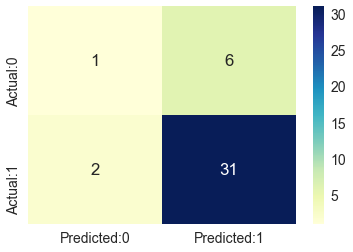

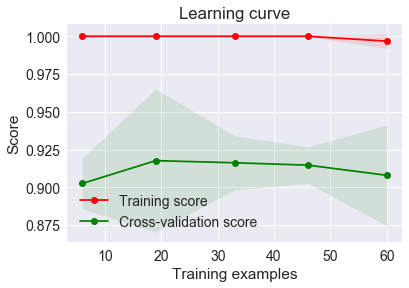

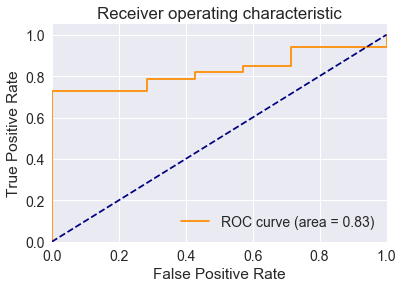

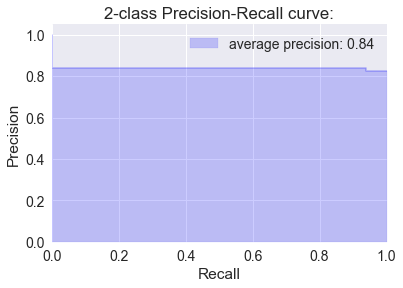

In [0]:
param_grid = {
}


grid_search = GridSearchCV(vc_soft  , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_oneH, y_train_oneH)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test_oneH)

  

y_pred= grid_search.predict_proba(X_test_oneH)
print_results(grid_search.best_estimator_,X_train_oneH,y_train_oneH,y_predictions,y_test,y_pred,scoring="f1")





# XGBOOST

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Best recall : 0.9625670028895835
Best parameters:
 {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 2, 'xgbclassifier__min_child_weight': 2, 'xgbclassifier__subsample': 0.8500000000000001}
             precision    recall  f1-score   support

          0       1.00      0.29      0.44         7
          1       0.87      1.00      0.93        33

avg / total       0.89      0.88      0.84        40


 TN =  2 
 TP =  33 
 FN =  0 
 FP =  5 
 precision = TP/(TP+FP) =  0.868421052631579 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.875 
 The Missclassification = 1-Accuracy =  0.125 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  1.0 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.868421052631579 
 Negative predictive Value = TN/(TN+FN) =  1.0 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.4 
 Negative likelihood Ratio = (1-Sensitivity)/Specif

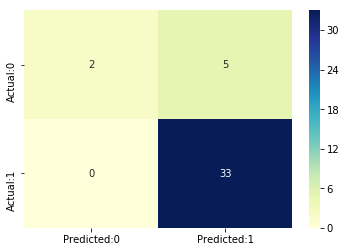

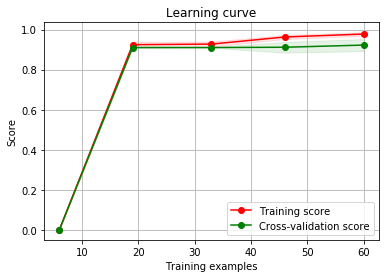

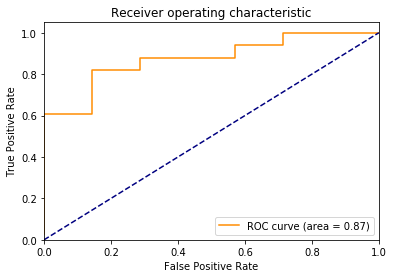

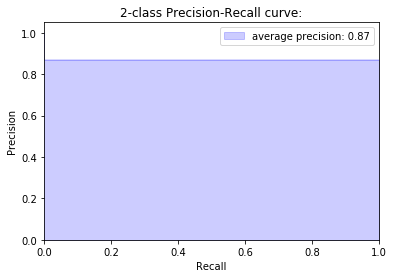

In [0]:
import pandas
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import json
from sklearn.model_selection import GridSearchCV


param_grid = {
        'xgbclassifier__learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
        'xgbclassifier__subsample': np.arange(0.05, 1.01, 0.05),
        'xgbclassifier__min_child_weight': range(1, 21),
        'xgbclassifier__max_depth': range(1,10)
}

pipe_XGBOOST = make_imb_pipeline(XGBClassifier())

grid_search = GridSearchCV(pipe_XGBOOST , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)

y_pred= grid_search.predict_proba(X_test)
print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1")

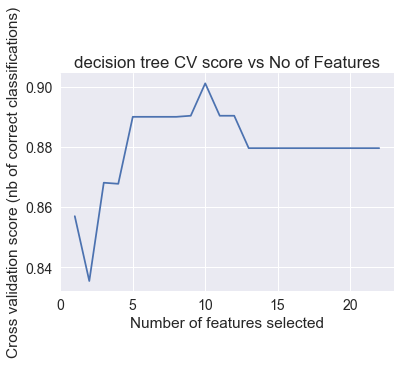

In [0]:
rfecv = RFECV(XGBClassifier(random_state=42), scoring="f1")
rfecv.fit(X_train, y_train)

X_train_rfe= rfecv.transform(X_train)
X_test_rfe= rfecv.transform(X_test)

plt.figure()
plt.title('decision tree CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
feature_names= list(X.columns.values)

feature_importance = list(zip(feature_names, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)
print(len(new_features))

['Leeftijd', 'Lengte', 'Gewicht', 'Hoe vaak snurken', 'Snurken andere mensen storen', 'Aantal keer stoppen ademen', 'Aantal dagen vermoeid', 'Hoge bloeddruk', 'Kans slaperig zitten openbare instelling', 'Kans slaperig zitten en praten']
10


Best recall : 0.9566121734053424
Best parameters:
 {}
[0.5837988  0.99369615 0.9550694  0.867243   0.94241464 0.07923143
 0.9630033  0.9822223  0.97772765 0.9673863  0.94943506 0.587085
 0.9682892  0.64689803 0.99202555 0.9518707  0.9946661  0.897536
 0.96235985 0.9775244  0.8755842  0.6245987  0.9731906  0.95676136
 0.98965514 0.987877   0.9497789  0.9829607  0.9656628  0.21626942
 0.98857003 0.95926267 0.97534674 0.97986686 0.98533094 0.9796967
 0.99343103 0.83068925 0.9834345  0.9263768 ]
3      0
25     1
83     1
78     0
59     0
94     0
42     1
91     1
93     1
79     1
85     1
54     1
22     1
106    1
73     1
65     1
121    1
63     1
39     1
32     1
33     0
10     1
36     1
88     1
16     1
28     1
56     1
37     1
96     1
124    0
31     1
113    1
72     1
86     1
45     1
40     1
92     1
21     1
99     0
110    1
Name: Apneu, dtype: int64
[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1

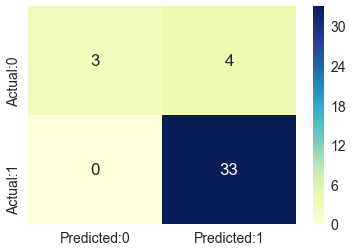

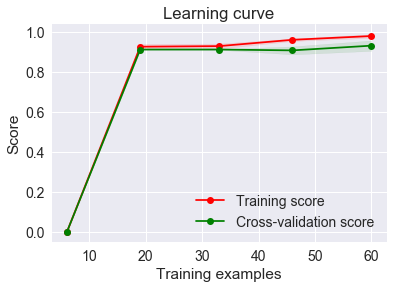

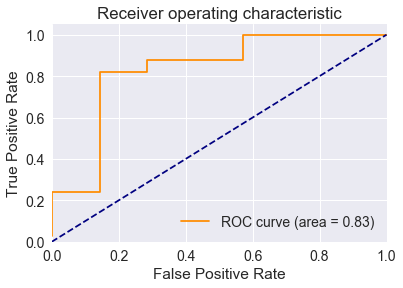

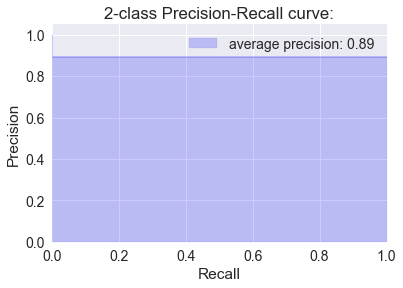

In [0]:
from sklearn.preprocessing import binarize
param_grid = {
        
}
pipe_XGBOOST = make_imb_pipeline(XGBClassifier(learning_rate = 0.1, max_depth = 2, min_child_weight= 2, subsample= 0.8500000000000001))


grid_search = GridSearchCV(pipe_XGBOOST , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_rfe, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)
y_pred_prob = grid_search.predict_proba(X_test_rfe)[:, 1]
y_predictions =grid_search.predict(X_test_rfe)

print(y_pred_prob)
print(y_test)
y_pred= grid_search.predict_proba(X_test_rfe)

y_pred_class = binarize([y_pred_prob], 0.58555)[0]
print(y_pred_class)
print_results(grid_search.best_estimator_,X_train_rfe,y_train,y_pred_class,y_test,y_pred,scoring="f1")

In [0]:
model = grid_search.best_estimator_.steps[0][1]
print (model)
print(model.feature_importances_)

for feat, importance in zip(new_features, model.feature_importances_):
    print ('feature: {f}, importance: {i}'.format(f=feat, i=importance))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=2, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8500000000000001)
[0.30769232 0.13286713 0.13286713 0.13986014 0.00699301 0.10489511
 0.06293707 0.03496503 0.02097902 0.05594406]
feature: Leeftijd, importance: 0.3076923191547394
feature: Lengte, importance: 0.13286712765693665
feature: Gewicht, importance: 0.13286712765693665
feature: Hoe vaak snurken, importance: 0.139860138297081
feature: Snurken andere mensen storen, importance: 0.00699300691485405
feature: Aantal keer stoppen ademen, importance: 0.10489510744810104
feature: Aantal dagen vermoeid, importance: 0.06293706595897675
feature: Hoge bloeddruk, importance: 0.03496503457427025
feature: Kans s

# Neural netwerk

[1.         1.         0.5        1.         1.         1.
 0.85714286 1.         0.85714286 1.        ]
Best recall : 0.9497643161436264
Best parameters:
 {'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 1, 'mlpclassifier__hidden_layer_sizes': 10, 'mlpclassifier__solver': 'lbfgs'}
             precision    recall  f1-score   support

          0       0.50      0.29      0.36         7
          1       0.86      0.94      0.90        33

avg / total       0.80      0.82      0.80        40


 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.825 
 The Missclassification = 1-Accuracy =  0.17500000000000004 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9393939393939394 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.2857142857142857 
 Positive Predictive value = TP/(TP+FP) =  0.8611111111111112 
 Negative predictive Value = TN/(TN+FN) =  0.5 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.3151515151515152 
 Negative likelihood Ratio = (1-Sen

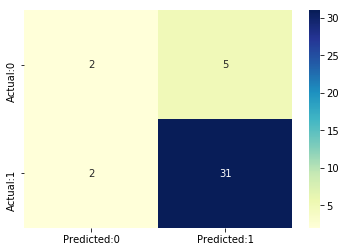

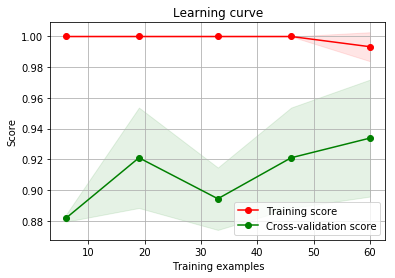

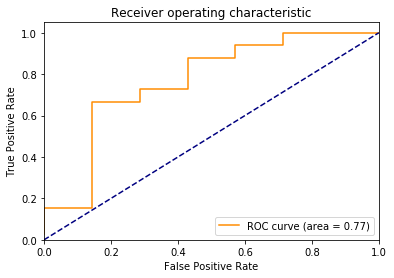

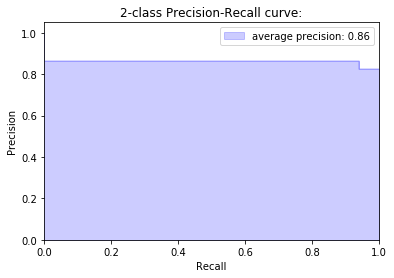

In [0]:
from sklearn.neural_network import MLPClassifier
param_grid = {
       "mlpclassifier__activation" : ["logistic", "tanh", "relu"],
    "mlpclassifier__solver" : ["lbfgs"],
    "mlpclassifier__hidden_layer_sizes" : (10,10,10),
    'mlpclassifier__alpha': [1,10,0.1]   
}

pipe_MLP = make_imb_pipeline(MLPClassifier())

grid_search = GridSearchCV(pipe_MLP , param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best recall :',best_recall)
print('Best parameters:\n',best_parameters)

y_predictions =grid_search.predict(X_test)

y_pred= grid_search.predict_proba(X_test)
print_results(grid_search.best_estimator_,X_train,y_train,y_predictions,y_test,y_pred,scoring="f1")